# Importación de librerías

In [1]:
# Librerías estándar
import os
import sys
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Configuración de warnings
warnings.filterwarnings('ignore')

# Análisis de nulos
import missingno as msno

# Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

# Textos
import unicodedata
from fuzzywuzzy import process
import re

# Estadistica
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportions_ztest



In [2]:
#!jupyter nbconvert --to script "Funciones_Fintech.ipynb" --output "Funciones_Fintech.py"

# Ruta archivos



In [3]:
# Definir ruta donde están los ficheros e importacion funciones
sys.path.append(r'C:\Ricardo\Cursos\Nuclio Digital School\Master Dual Data & AI\Entregables\TFM Fintech\Dataset')
import Funciones_Fintech as funciones

In [4]:
# Definir el path
path = r'C:\Ricardo\Cursos\Nuclio Digital School\Master Dual Data & AI\Entregables\TFM Fintech\Dataset'

# Carga de datos

In [5]:
# # Pasar la funcion para cargar archivos.
funciones.carga_archivos(path)

📂 Total archivos encontrados: 5
['bank-additional_bank-additional-full.csv', 'consumer confidence index portugal.csv', 'consumer price index portugal.csv', 'employement rate portugal.csv', 'euribor 3m index.csv']
********************************************************************************
✅ Archivos CSV/Excel válidos: 5
   1. bank-additional_bank-additional-full.csv
   2. consumer confidence index portugal.csv
   3. consumer price index portugal.csv
   4. employement rate portugal.csv
   5. euribor 3m index.csv
********************************************************************************


['bank-additional_bank-additional-full.csv',
 'consumer confidence index portugal.csv',
 'consumer price index portugal.csv',
 'employement rate portugal.csv',
 'euribor 3m index.csv']

In [6]:
# Creamos un dicionario vacion para añadir todos los archivos leidos de la funcion leer_archivos.
files=funciones.carga_archivos(path)
dict_data = {}

for x in files:
    ruta = os.path.join(path, x)
    df_temp = funciones.leer_archivos(ruta)
    
    if df_temp is not None:
        dict_data[x] = df_temp
        print(f"✅ {x}: {df_temp.shape}")
    else:
        print(f"❌ {x}: No se pudo cargar")

# Eliminamos df_temp para poder añadir nuevos archivos.
if 'df_temp' in locals():
    del df_temp

# Mostramos resumen de la carga de archivos.
print(f"\n📊 {len(dict_data)}/{len(files)} archivos cargados exitosamente")

📂 Total archivos encontrados: 5
['bank-additional_bank-additional-full.csv', 'consumer confidence index portugal.csv', 'consumer price index portugal.csv', 'employement rate portugal.csv', 'euribor 3m index.csv']
********************************************************************************
✅ Archivos CSV/Excel válidos: 5
   1. bank-additional_bank-additional-full.csv
   2. consumer confidence index portugal.csv
   3. consumer price index portugal.csv
   4. employement rate portugal.csv
   5. euribor 3m index.csv
********************************************************************************
   ✓ Codificación exitosa: utf-8
✅ bank-additional_bank-additional-full.csv: (41188, 21)
   ✓ Codificación exitosa: latin-1
✅ consumer confidence index portugal.csv: (24, 3)
   ✓ Codificación exitosa: latin-1
✅ consumer price index portugal.csv: (24, 3)
   ✓ Codificación exitosa: utf-8
✅ employement rate portugal.csv: (24, 3)
   ✓ Codificación exitosa: utf-8
✅ euribor 3m index.csv: (24, 3)

📊 5/

In [7]:
dict_data.keys()

dict_keys(['bank-additional_bank-additional-full.csv', 'consumer confidence index portugal.csv', 'consumer price index portugal.csv', 'employement rate portugal.csv', 'euribor 3m index.csv'])

# Exploración inicial de los datos



In [8]:
# Creamos un dicionario vacio para la exploracion
dict_exploracion = {}

for k, v in dict_data.items():
    print(f"📊 EXPLORANDO: {k}")
    print("="*120)
    
    # Ejecutamos y guardamos la exploracion.
    exploracion=funciones.exploracion_datos(v)
    dict_exploracion[k]=exploracion
    
    print("\n" + "="*120 + "\n")

📊 EXPLORANDO: bank-additional_bank-additional-full.csv
Exploración inicial de datos:
****************************************************************************************************
El numero de filas es: 41188
El numero de columnas es: 21
****************************************************************************************************
Las 5 primeras filas del dataframe son:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


****************************************************************************************************
Las 5 últimas filas del dataframe son:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


****************************************************************************************************
Muestra aleatoria de 5 filas del dataframe:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
13803,41,entrepreneur,divorced,professional.course,no,yes,yes,cellular,jul,thu,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
8091,36,admin.,married,university.degree,no,yes,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
21560,59,blue-collar,married,basic.4y,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4245,48,technician,married,unknown,no,yes,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
19171,46,housemaid,married,basic.9y,no,yes,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


****************************************************************************************************
Estadísticos descriptivos del dataframe:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


****************************************************************************************************
Resumen de tipología de datos, visualización de nulos y valores únicos:


,Tipos de datos,Nulos,Porcentaje Nulos,Numero valores unicos,Porcentaje valores unicos,Valores unicos
age,int64,0,0.0,78,0.189376,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,object,0,0.0,12,0.029135,"[housemaid, services, admin., blue-collar, tec..."
marital,object,0,0.0,4,0.009712,"[married, single, divorced, unknown]"
education,object,0,0.0,8,0.019423,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,object,0,0.0,3,0.007284,"[no, unknown, yes]"
housing,object,0,0.0,3,0.007284,"[no, yes, unknown]"
loan,object,0,0.0,3,0.007284,"[no, yes, unknown]"
contact,object,0,0.0,2,0.004856,"[telephone, cellular]"
month,object,0,0.0,10,0.024279,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,object,0,0.0,5,0.012139,"[mon, tue, wed, thu, fri]"


****************************************************************************************************


📊 EXPLORANDO: consumer confidence index portugal.csv
Exploración inicial de datos:
****************************************************************************************************
El numero de filas es: 24
El numero de columnas es: 3
****************************************************************************************************
Las 5 primeras filas del dataframe son:


,Año,Trimestre,ConfianzaConsumidor
0,2008,Q1,-28.3
1,2008,Q2,-30.1
2,2008,Q3,-32.4
3,2008,Q4,-34.2
4,2009,Q1,-36.5


****************************************************************************************************
Las 5 últimas filas del dataframe son:


,Año,Trimestre,ConfianzaConsumidor
19,2012,Q4,-49.2
20,2013,Q1,-38.4
21,2013,Q2,-35.6
22,2013,Q3,-33.7
23,2013,Q4,-32.5


****************************************************************************************************
Muestra aleatoria de 5 filas del dataframe:


,Año,Trimestre,ConfianzaConsumidor
9,2010,Q2,-27.6
3,2008,Q4,-34.2
4,2009,Q1,-36.5
11,2010,Q4,-28.1
1,2008,Q2,-30.1


****************************************************************************************************
Estadísticos descriptivos del dataframe:


,Año,ConfianzaConsumidor
count,24.000000,24.000000
mean,2010.500000,-36.887500
std,1.744557,7.059272
min,2008.000000,-50.000000
25%,2009.000000,-40.775000
50%,2010.500000,-36.100000
75%,2012.000000,-31.825000
max,2013.000000,-26.800000


****************************************************************************************************
Resumen de tipología de datos, visualización de nulos y valores únicos:


,Tipos de datos,Nulos,Porcentaje Nulos,Numero valores unicos,Porcentaje valores unicos,Valores unicos
Año,int64,0,0.0,6,25.000000,"[2008, 2009, 2010, 2011, 2012, 2013]"
Trimestre,object,0,0.0,4,16.666667,"[Q1, Q2, Q3, Q4]"
ConfianzaConsumidor,float64,0,0.0,24,100.000000,"[-28.3, -30.1, -32.4, -34.2, -36.5, -38.7, -39..."


****************************************************************************************************


📊 EXPLORANDO: consumer price index portugal.csv
Exploración inicial de datos:
****************************************************************************************************
El numero de filas es: 24
El numero de columnas es: 3
****************************************************************************************************
Las 5 primeras filas del dataframe son:


,Año,Trimestre,CPI
0,2008,Q1,92.4
1,2008,Q2,93.1
2,2008,Q3,94.0
3,2008,Q4,94.5
4,2009,Q1,94.2


****************************************************************************************************
Las 5 últimas filas del dataframe son:


,Año,Trimestre,CPI
19,2012,Q4,105.6
20,2013,Q1,106.0
21,2013,Q2,106.5
22,2013,Q3,107.0
23,2013,Q4,107.4


****************************************************************************************************
Muestra aleatoria de 5 filas del dataframe:


,Año,Trimestre,CPI
22,2013,Q3,107.0
11,2010,Q4,97.8
4,2009,Q1,94.2
8,2010,Q1,96.0
20,2013,Q1,106.0


****************************************************************************************************
Estadísticos descriptivos del dataframe:


,Año,CPI
count,24.000000,24.000000
mean,2010.500000,99.416667
std,1.744557,5.096688
min,2008.000000,92.400000
25%,2009.000000,94.575000
50%,2010.500000,98.400000
75%,2012.000000,104.400000
max,2013.000000,107.400000


****************************************************************************************************
Resumen de tipología de datos, visualización de nulos y valores únicos:


,Tipos de datos,Nulos,Porcentaje Nulos,Numero valores unicos,Porcentaje valores unicos,Valores unicos
Año,int64,0,0.0,6,25.000000,"[2008, 2009, 2010, 2011, 2012, 2013]"
Trimestre,object,0,0.0,4,16.666667,"[Q1, Q2, Q3, Q4]"
CPI,float64,0,0.0,23,95.833333,"[92.4, 93.1, 94.0, 94.5, 94.2, 94.6, 95.1, 96...."


****************************************************************************************************


📊 EXPLORANDO: employement rate portugal.csv
Exploración inicial de datos:
****************************************************************************************************
El numero de filas es: 24
El numero de columnas es: 3
****************************************************************************************************
Las 5 primeras filas del dataframe son:


,Year,Quarter,EmploymentRate(%)
0,2008,Q1,61.5
1,2008,Q2,61.3
2,2008,Q3,61.1
3,2008,Q4,60.9
4,2009,Q1,60.4


****************************************************************************************************
Las 5 últimas filas del dataframe son:


,Year,Quarter,EmploymentRate(%)
19,2012,Q4,54.8
20,2013,Q1,53.2
21,2013,Q2,52.7
22,2013,Q3,52.3
23,2013,Q4,52.1


****************************************************************************************************
Muestra aleatoria de 5 filas del dataframe:


,Year,Quarter,EmploymentRate(%)
21,2013,Q2,52.7
7,2009,Q4,59.6
17,2012,Q2,56.1
11,2010,Q4,59.4
2,2008,Q3,61.1


****************************************************************************************************
Estadísticos descriptivos del dataframe:


,Year,EmploymentRate(%)
count,24.000000,24.000000
mean,2010.500000,57.879167
std,1.744557,3.008825
min,2008.000000,52.100000
25%,2009.000000,55.950000
50%,2010.500000,59.150000
75%,2012.000000,59.875000
max,2013.000000,61.500000


****************************************************************************************************
Resumen de tipología de datos, visualización de nulos y valores únicos:


,Tipos de datos,Nulos,Porcentaje Nulos,Numero valores unicos,Porcentaje valores unicos,Valores unicos
Year,int64,0,0.0,6,25.000000,"[2008, 2009, 2010, 2011, 2012, 2013]"
Quarter,object,0,0.0,4,16.666667,"[Q1, Q2, Q3, Q4]"
EmploymentRate(%),float64,0,0.0,23,95.833333,"[61.5, 61.3, 61.1, 60.9, 60.4, 60.1, 59.8, 59...."


****************************************************************************************************


📊 EXPLORANDO: euribor 3m index.csv
Exploración inicial de datos:
****************************************************************************************************
El numero de filas es: 24
El numero de columnas es: 3
****************************************************************************************************
Las 5 primeras filas del dataframe son:


,Year,Quarter,Euribor3M(%)
0,2008,Q1,4.39
1,2008,Q2,4.95
2,2008,Q3,5.00
3,2008,Q4,3.95
4,2009,Q1,2.00


****************************************************************************************************
Las 5 últimas filas del dataframe son:


,Year,Quarter,Euribor3M(%)
19,2012,Q4,0.19
20,2013,Q1,0.21
21,2013,Q2,0.22
22,2013,Q3,0.23
23,2013,Q4,0.29


****************************************************************************************************
Muestra aleatoria de 5 filas del dataframe:


,Year,Quarter,Euribor3M(%)
3,2008,Q4,3.95
9,2010,Q2,0.75
15,2011,Q4,1.36
0,2008,Q1,4.39
10,2010,Q3,0.92


****************************************************************************************************
Estadísticos descriptivos del dataframe:


,Year,Euribor3M(%)
count,24.000000,24.000000
mean,2010.500000,1.495417
std,1.744557,1.503058
min,2008.000000,0.190000
25%,2009.000000,0.562500
50%,2010.500000,1.005000
75%,2012.000000,1.565000
max,2013.000000,5.000000


****************************************************************************************************
Resumen de tipología de datos, visualización de nulos y valores únicos:


,Tipos de datos,Nulos,Porcentaje Nulos,Numero valores unicos,Porcentaje valores unicos,Valores unicos
Year,int64,0,0.0,6,25.000000,"[2008, 2009, 2010, 2011, 2012, 2013]"
Quarter,object,0,0.0,4,16.666667,"[Q1, Q2, Q3, Q4]"
Euribor3M(%),float64,0,0.0,24,100.000000,"[4.39, 4.95, 5.0, 3.95, 2.0, 1.61, 1.28, 0.7, ..."


****************************************************************************************************




# Limpieza de datos y configuracion de datos

In [9]:
# Asignamos a la variable df_bank el archivo bank-additional_bank-additional-full.csv
df_bank=dict_data['bank-additional_bank-additional-full.csv']

# Asignamos a los diferentes dataframes los archivos macroeconómicos.
df_consumer_confidence_index=dict_data['consumer confidence index portugal.csv']
df_consumer_price_index=dict_data['consumer price index portugal.csv']
df_eployement_rate=dict_data['employement rate portugal.csv']
df_euribor_3m=dict_data['euribor 3m index.csv']

In [10]:
# Comprobacion y registro de valores duplicados en todas las columnas.
registros_duplicados=df_bank[df_bank.duplicated()]
df_bank_clean=df_bank.drop_duplicates()
print('df_bank contiene:', df_bank.shape[0], 'filas'
      '\ndf_bank_clean contiene:', df_bank_clean.shape[0], 'filas'
      '\nnumero de filas eliminadas:', df_bank.shape[0]-df_bank_clean.shape[0],
      '\nregistros duplicados contiene:', registros_duplicados.shape[0], 'filas')

df_bank contiene: 41188 filas
df_bank_clean contiene: 41176 filas
numero de filas eliminadas: 12 
registros duplicados contiene: 12 filas


In [11]:
# Definimos intervalos bins para edad y creamos una columna age_group.
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '65+']
df_bank_clean['age_group'] = pd.cut(df_bank_clean['age'],bins=bins,labels=labels,right=False)
# Creamos una columna con la duracion de la ultima llamada en minutos.
df_bank_clean['last_contact_duration_mins'] = df_bank_clean['duration'] / 60
# Definimos intervalos bins para last contact duration mins.
bins=[0,1,2,3,5,10,20,np.inf]
labels=['0 - 1','1 - 2','2 - 3','3 - 5','5 - 10','10 - 20','20+']
df_bank_clean['last_contact_duration_mins_group'] = pd.cut(df_bank_clean['last_contact_duration_mins'],
                                                          bins=bins,labels=labels,right=False)
# Definimos bins para employement_variation_rate.
bins=[-np.inf,-0.5,0,0.5,np.inf]
labels=['< -0.5','-0.5 - 0','0 - 0.5','> 0.5']
df_bank_clean['employement_variation_rate_group']=pd.cut(df_bank_clean['emp.var.rate'],bins=bins,labels=labels,right=False)
# Definimos bins para consumer_price_index.
bins=[-np.inf,90,94,100,104,np.inf]
labels=['<90','90 - 94','94 - 100','100 - 104','104+']
df_bank_clean['consumer_price_index_group']=pd.cut(df_bank_clean['cons.price.idx'],bins=bins,labels=labels,right=False)
# Definimos bins para consumer_confidence_index.
bins=[-np.inf,-35,0,35,100,np.inf]
labels=['<=-35', '-35 - 0', '0 - 35','35 - 100','> 100']
df_bank_clean['consumer_confidence_index_group']=pd.cut(df_bank_clean['cons.conf.idx'],bins=bins,labels=labels,right=False)
# Definimos intervalos  para euribor_3m.
bins=[-np.inf,0,1,2,3,4,5,np.inf]
labels=['<0','0 - 1','1 - 2','2 - 3','3 - 4','4 - 5','5+']
df_bank_clean['euribor_3m_group']=pd.cut(df_bank_clean['euribor3m'],bins=bins,labels=labels,right=False)

In [12]:
# Ejecutamos las funciones de renombrar columnas, normalizar textos y crear las columnas categoricas.
funciones.renombrar_columnas(df_bank_clean)
funciones.normalizar_textos(df_bank_clean)
funciones.columnas_categoricas(df_bank_clean)

,age,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,euribor_3m,number_employees,subscribed_term_deposit,age_group,last_contact_duration_mins,last_contact_duration_mins_group,employement_variation_rate_group,consumer_price_index_group,consumer_confidence_index_group,euribor_3m_group
0,56,housemaid,married,basic_4y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,56 - 65,4.350000,3 - 5,> 0.5,90 - 94,<=-35,4 - 5
1,57,services,married,high_school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,no,56 - 65,2.483333,2 - 3,> 0.5,90 - 94,<=-35,4 - 5
2,37,services,married,high_school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,36 - 45,3.766667,3 - 5,> 0.5,90 - 94,<=-35,4 - 5
3,40,administrative_staff,married,basic_6y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,36 - 45,2.516667,2 - 3,> 0.5,90 - 94,<=-35,4 - 5
4,56,services,married,high_school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,56 - 65,5.116667,5 - 10,> 0.5,90 - 94,<=-35,4 - 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional_course,no,yes,no,cellular,nov,fri,...,1.028,4963.6,yes,65+,5.566667,5 - 10,< -0.5,94 - 100,<=-35,1 - 2
41184,46,blue_collar,married,professional_course,no,no,no,cellular,nov,fri,...,1.028,4963.6,no,46 - 55,6.383333,5 - 10,< -0.5,94 - 100,<=-35,1 - 2
41185,56,retired,married,university_degree,no,yes,no,cellular,nov,fri,...,1.028,4963.6,no,56 - 65,3.150000,3 - 5,< -0.5,94 - 100,<=-35,1 - 2
41186,44,technician,married,professional_course,no,no,no,cellular,nov,fri,...,1.028,4963.6,yes,36 - 45,7.366667,5 - 10,< -0.5,94 - 100,<=-35,1 - 2


In [13]:
# Comprobacion de valores duplicados en el dataset de las columnas indicadas.
columnas_a_verificar=['age', 'job', 'marital_status', 'education']
print('El numero de valores duplicados en df_bank_clean es:',
      df_bank_clean.duplicated(subset=columnas_a_verificar).sum())

El numero de valores duplicados en df_bank_clean es: 36600


In [14]:
# Comprobacion no esta asignada.
df_bank_clean.drop_duplicates(subset=columnas_a_verificar)

,age,job,marital_status,education,credit_default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,euribor_3m,number_employees,subscribed_term_deposit,age_group,last_contact_duration_mins,last_contact_duration_mins_group,employement_variation_rate_group,consumer_price_index_group,consumer_confidence_index_group,euribor_3m_group
0,56,housemaid,married,basic_4y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,56 - 65,4.350000,3 - 5,> 0.5,90 - 94,<=-35,4 - 5
1,57,services,married,high_school,unknown,no,no,telephone,may,mon,...,4.857,5191.0,no,56 - 65,2.483333,2 - 3,> 0.5,90 - 94,<=-35,4 - 5
2,37,services,married,high_school,no,yes,no,telephone,may,mon,...,4.857,5191.0,no,36 - 45,3.766667,3 - 5,> 0.5,90 - 94,<=-35,4 - 5
3,40,administrative_staff,married,basic_6y,no,no,no,telephone,may,mon,...,4.857,5191.0,no,36 - 45,2.516667,2 - 3,> 0.5,90 - 94,<=-35,4 - 5
4,56,services,married,high_school,no,no,yes,telephone,may,mon,...,4.857,5191.0,no,56 - 65,5.116667,5 - 10,> 0.5,90 - 94,<=-35,4 - 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41138,58,unemployed,married,university_degree,no,yes,no,cellular,nov,thu,...,1.041,4963.6,yes,56 - 65,5.733333,5 - 10,< -0.5,94 - 100,<=-35,1 - 2
41158,35,technician,divorced,basic_4y,no,no,no,cellular,nov,tue,...,1.035,4963.6,yes,36 - 45,6.050000,5 - 10,< -0.5,94 - 100,<=-35,1 - 2
41169,62,services,married,high_school,no,yes,no,cellular,nov,wed,...,1.030,4963.6,no,56 - 65,2.566667,2 - 3,< -0.5,94 - 100,<=-35,1 - 2
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1.031,4963.6,no,26 - 35,3.000000,3 - 5,< -0.5,94 - 100,<=-35,1 - 2


In [15]:
# Creamos una copia para pasar la funcion normalizar_binario de la columna subscribed_term_deposit.
df_binario=df_bank_clean.copy()
funciones.normalizar_binario(df_binario)

# Analisis EDA

## Analisis tipologia de cliente

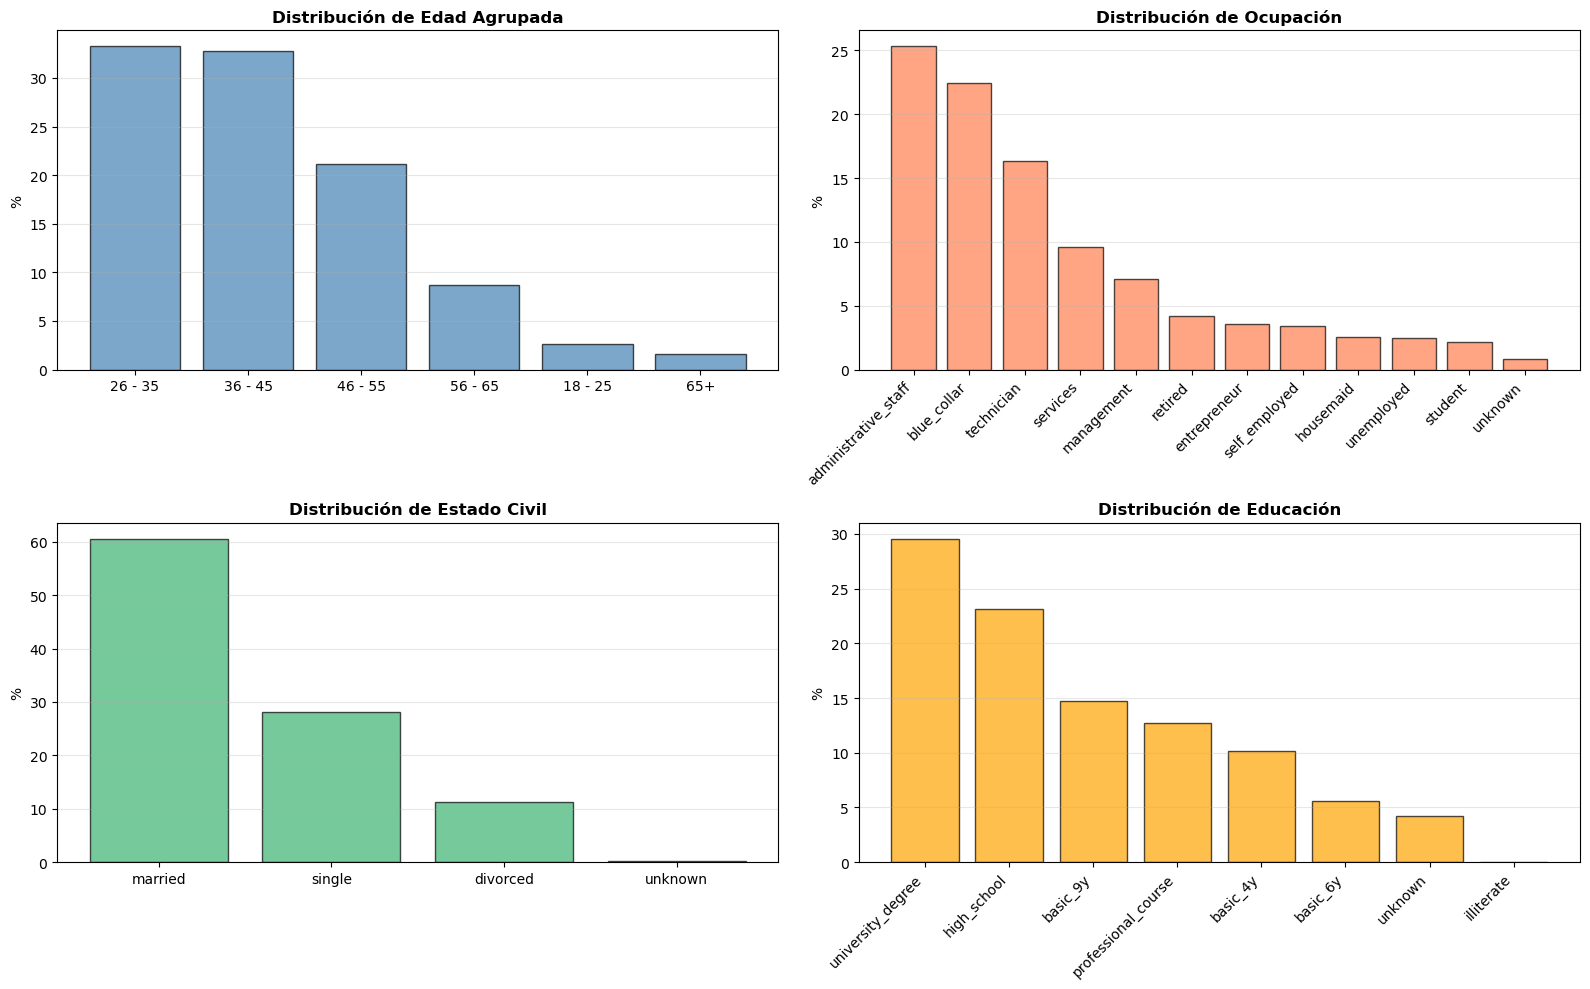

In [16]:
# Análisis de los clientes
df_bank_clean_age = df_bank_clean.age_group.value_counts(normalize=True) * 100
df_bank_clean_job = df_bank_clean.job.value_counts(normalize=True) * 100
df_bank_clean_marital_status = df_bank_clean.marital_status.value_counts(normalize=True) * 100
df_bank_clean_education = df_bank_clean.education.value_counts(normalize=True) * 100

# Graficamos las variables
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# Gráfico Edad agrupada.
axes[0, 0].bar(
    df_bank_clean_age.index.astype(str),
    df_bank_clean_age.values,  
    color='steelblue',
    edgecolor='black',
    alpha=0.7)
axes[0, 0].set_title('Distribución de Edad Agrupada', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('%')
axes[0, 0].tick_params(axis='x', rotation=0, labelsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)
# Gráfico Ocupacion.
axes[0, 1].bar(
    df_bank_clean_job.index.astype(str),
    df_bank_clean_job.values,
    color='coral',
    edgecolor='black',
    alpha=0.7)
axes[0, 1].set_title('Distribución de Ocupación', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('%')
axes[0, 1].tick_params(axis='x', rotation=45)
plt.setp(axes[0, 1].get_xticklabels(), ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)
# Gráfico Estado civil.
axes[1, 0].bar(
    df_bank_clean_marital_status.index.astype(str),
    df_bank_clean_marital_status.values,
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.7)
axes[1, 0].set_title('Distribución de Estado Civil', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('%')
axes[1, 0].grid(axis='y', alpha=0.3)
# Gráfico Educacion.
axes[1, 1].bar(
    df_bank_clean_education.index.astype(str),
    df_bank_clean_education.values,
    color='orange',
    edgecolor='black',
    alpha=0.7)
axes[1, 1].set_title('Distribución de Educación', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('%')
axes[1, 1].tick_params(axis='x', rotation=45)
plt.setp(axes[1, 1].get_xticklabels(), ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## Analisis macroeconomico

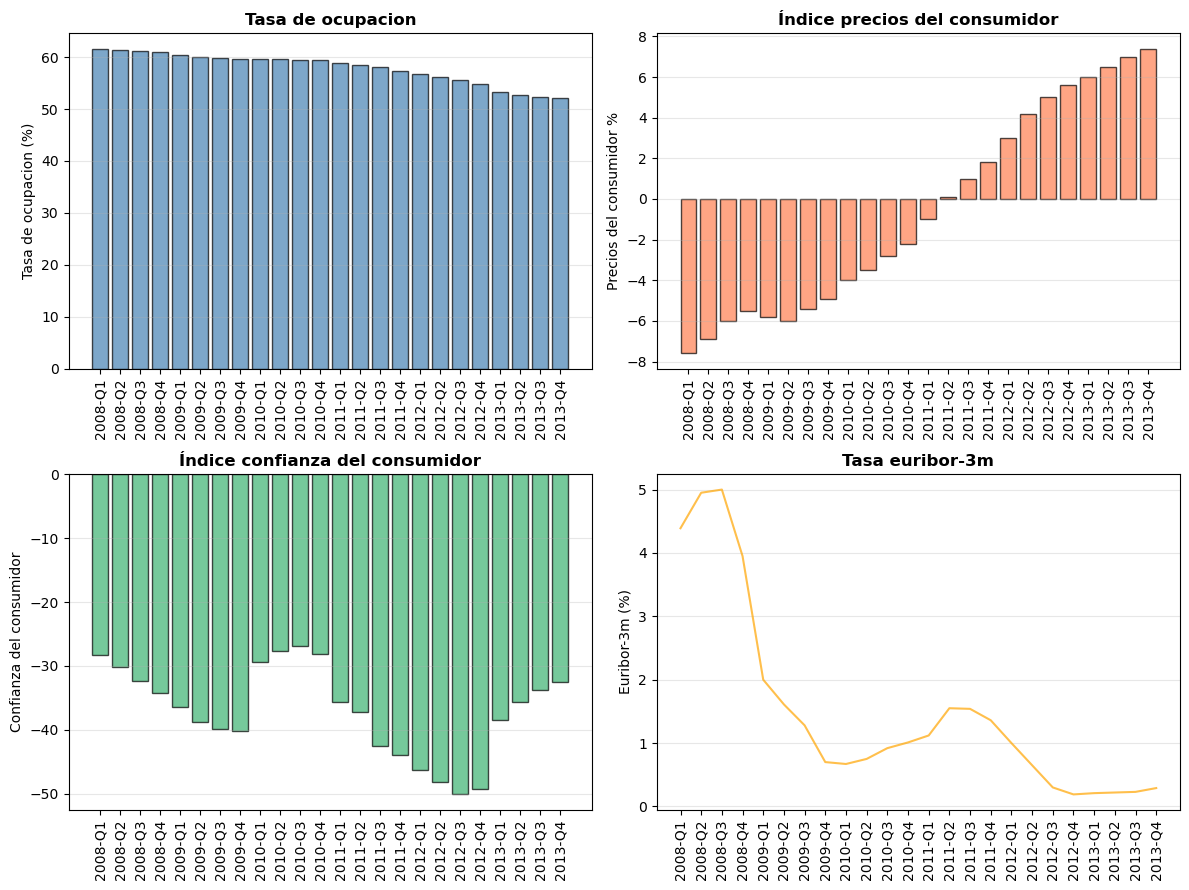

In [17]:
# Añadimos columna fecha para concatenar en la misma columna año y trimestre y despues graficar.
df_eployement_rate['Fecha']=(df_eployement_rate['Year'].astype(str) + '-' 
                                         + df_eployement_rate['Quarter'].astype(str).str.zfill(2))

df_consumer_price_index['Fecha']=(df_consumer_price_index['Año'].astype(str) + '-' 
                                         + df_consumer_price_index['Trimestre'].astype(str).str.zfill(2))

df_consumer_confidence_index['Fecha'] = (df_consumer_confidence_index['Año'].astype(str) + '-' 
                                         + df_consumer_confidence_index['Trimestre'].astype(str).str.zfill(2))

df_euribor_3m['Fecha']=(df_euribor_3m['Year'].astype(str) + '-' 
                                         + df_euribor_3m['Quarter'].astype(str).str.zfill(2))

# Graficamos las variables macroeconómicas
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Gráfico Tasa variación de ocupacion.
axes[0, 0].bar(
    df_eployement_rate.iloc[:, -1].values,  
    df_eployement_rate.iloc[:, -2].values,
    color='steelblue',
    edgecolor='black',
    alpha=0.7)
axes[0, 0].set_title('Tasa de ocupacion', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Tasa de ocupacion (%)')
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfico Indice precios del consumidor
axes[0, 1].bar(
    df_consumer_price_index.iloc[:, -1].values, 
    df_consumer_price_index.iloc[:, -2].values-100, # Normalizamos sobre base 100
    color='coral',
    edgecolor='black',
    alpha=0.7)
axes[0, 1].set_title('Índice precios del consumidor', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Precios del consumidor %')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].grid(axis='y', alpha=0.3)

# Gráfico confianza del consumidor
axes[1, 0].bar(
    df_consumer_confidence_index.iloc[:, -1].values,  
    df_consumer_confidence_index.iloc[:, -2].values,  
    color='mediumseagreen',
    edgecolor='black',
    alpha=0.7)
axes[1, 0].set_title('Índice confianza del consumidor', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Confianza del consumidor')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].grid(axis='y', alpha=0.3)

# Gráfico Euribor 3m.
axes[1, 1].plot(
    df_euribor_3m.iloc[:, -1].values,  
    df_euribor_3m.iloc[:, -2].values,  
    color='orange',
    alpha=0.7)
axes[1, 1].set_title('Tasa euribor-3m', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Euribor-3m (%)')
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Contrataciones depostito

In [18]:
# Contrataciones sobre total de interacciones.
df_binario['subscribed_term_deposit'].mean()*100

11.266271614532737

In [19]:
# Contrataciones por numero de clientes.
(df_binario['subscribed_term_deposit'].sum()/(df_binario['number_of_previous_contacts']==0).sum())*100

13.048859385108717

# Correlaciones

## Correlaciones metodo spearman

### Correlaciones por tipo de cliente

In [20]:
# Creamos una copia solo con las columnas necesarias para el analisis de correlacion.
df_correlacion_tipologia_cliente_spearman=df_binario[['subscribed_term_deposit','age', 'job', 
                                                      'marital_status', 'education']].copy()
# Convertimos las columnas categoricas a numericas para el calculo de correlacion de Spearman.
mapping_job = dict(zip(df_correlacion_tipologia_cliente_spearman['job'].cat.categories, 
                       range(len(df_correlacion_tipologia_cliente_spearman['job'].cat.categories))))
df_correlacion_tipologia_cliente_spearman['job']=df_correlacion_tipologia_cliente_spearman['job'].map(mapping_job).astype('int64')

mapping_marital_status = dict(zip(df_correlacion_tipologia_cliente_spearman['marital_status'].cat.categories, 
                       range(len(df_correlacion_tipologia_cliente_spearman['marital_status'].cat.categories))))
df_correlacion_tipologia_cliente_spearman['marital_status']=df_correlacion_tipologia_cliente_spearman['marital_status'].map(mapping_marital_status).astype('int64')

mapping_education = dict(zip(df_correlacion_tipologia_cliente_spearman['education'].cat.categories, 
                       range(len(df_correlacion_tipologia_cliente_spearman['education'].cat.categories))))
df_correlacion_tipologia_cliente_spearman['education']=df_correlacion_tipologia_cliente_spearman['education'].map(mapping_education).astype('int64')

df_correlacion_tipologia_cliente_spearman=df_correlacion_tipologia_cliente_spearman.corr('spearman').iloc[0,1:].to_frame()

age,31,32,33,36,35,34,30,37,29,39,...,86,84,17,92,98,89,91,94,87,95
count,1947,1845,1833,1779,1758,1745,1714,1475,1453,1430,...,8,7,5,4,2,2,2,1,1,1


age,31,32,33,36,35,34,30,37,29,39,...,86,84,17,92,98,89,91,94,87,95
proportion,4.728483,4.480765,4.451622,4.320478,4.269477,4.237906,4.162619,3.582184,3.528755,3.472897,...,0.019429,0.017,0.012143,0.009714,0.004857,0.004857,0.004857,0.002429,0.002429,0.002429


********************************************************************************


job,administrative_staff,blue_collar,technician,services,management,retired,entrepreneur,self_employed,housemaid,unemployed,student,unknown
count,10419,9253,6739,3967,2924,1718,1456,1421,1060,1014,875,330


job,administrative_staff,blue_collar,technician,services,management,retired,entrepreneur,self_employed,housemaid,unemployed,student,unknown
proportion,25.303575,22.471828,16.36633,9.634253,7.101224,4.172333,3.53604,3.451039,2.574315,2.4626,2.125024,0.801438


********************************************************************************


marital_status,married,single,divorced,unknown
count,24921,11564,4611,80


marital_status,married,single,divorced,unknown
proportion,60.52312,28.084321,11.198271,0.194288


********************************************************************************


education,university_degree,high_school,basic_9y,professional_course,basic_4y,basic_6y,unknown,illiterate
count,12164,9512,6045,5240,4176,2291,1730,18


education,university_degree,high_school,basic_9y,professional_course,basic_4y,basic_6y,unknown,illiterate
proportion,29.54148,23.100835,14.680882,12.72586,10.14183,5.563921,4.201477,0.043715


********************************************************************************


,subscribed_term_deposit
age,-0.011913
job,-0.024231
marital_status,-0.048348
education,0.045506


********************************************************************************


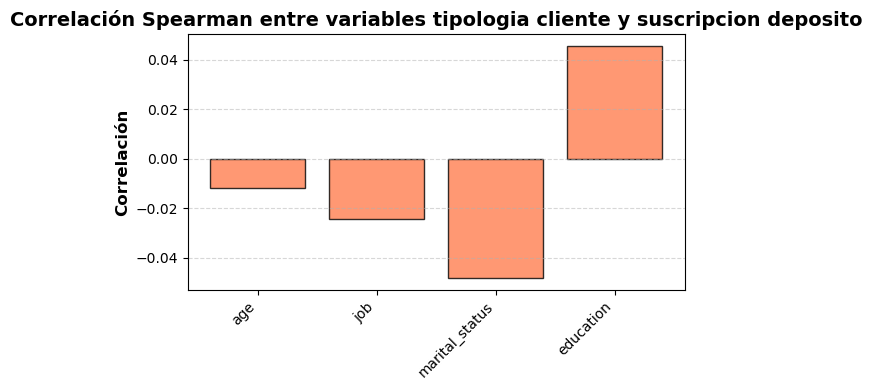

In [21]:
funciones.grafico_correlacion_spearman(df_correlacion_tipologia_cliente_spearman,df_binario,'Correlación Spearman entre variables tipologia cliente y suscripcion deposito')

### Correlaciones estado financiero cliente

In [22]:
# Creamos una copia solo con las columnas necesarias para el analisis de correlacion.
df_correlacion_estado_financiero_spearman=df_binario[['subscribed_term_deposit', 'credit_default',
                                                        'housing_loan', 'personal_loan']].copy()
# Convertimos las columnas categoricas a numericas para el calculo de correlacion de Spearman.
mapping_credit_default = dict(zip(df_correlacion_estado_financiero_spearman['credit_default'].cat.categories, 
                       range(len(df_correlacion_estado_financiero_spearman['credit_default'].cat.categories))))
df_correlacion_estado_financiero_spearman['credit_default']=df_correlacion_estado_financiero_spearman['credit_default'].map(mapping_credit_default).astype('int64')

mapping_housing_loan = dict(zip(df_correlacion_estado_financiero_spearman['housing_loan'].cat.categories, 
                       range(len(df_correlacion_estado_financiero_spearman['housing_loan'].cat.categories))))
df_correlacion_estado_financiero_spearman['housing_loan']=df_correlacion_estado_financiero_spearman['housing_loan'].map(mapping_housing_loan).astype('int64')

mapping_personal_loan = dict(zip(df_correlacion_estado_financiero_spearman['personal_loan'].cat.categories, 
                       range(len(df_correlacion_estado_financiero_spearman['personal_loan'].cat.categories))))
df_correlacion_estado_financiero_spearman['personal_loan']=df_correlacion_estado_financiero_spearman['personal_loan'].map(mapping_personal_loan).astype('int64')

df_correlacion_estado_financiero_spearman=df_correlacion_estado_financiero_spearman.corr('spearman').iloc[0,1:].to_frame()

credit_default,no,unknown,yes
count,32577,8596,3


credit_default,no,unknown,yes
proportion,79.116476,20.876239,0.007286


********************************************************************************


housing_loan,yes,no,unknown
count,21571,18615,990


housing_loan,yes,no,unknown
proportion,52.387313,45.208374,2.404313


********************************************************************************


personal_loan,no,yes,unknown
count,33938,6248,990


personal_loan,no,yes,unknown
proportion,82.421799,15.173888,2.404313


********************************************************************************


,subscribed_term_deposit
credit_default,0.099349
housing_loan,-0.010351
personal_loan,0.005162


********************************************************************************


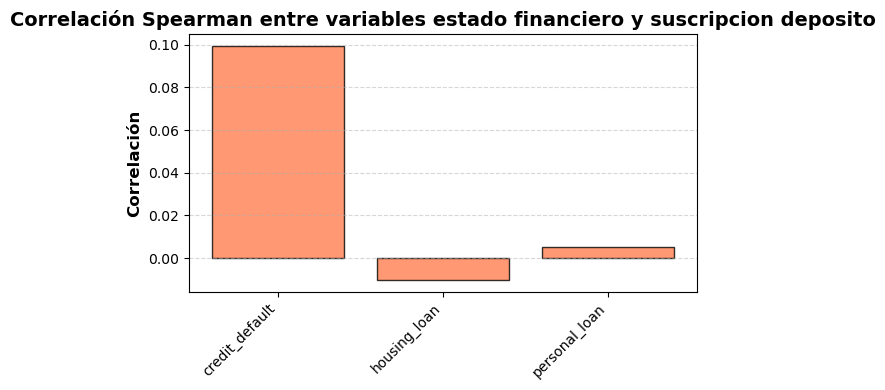

In [23]:
funciones.grafico_correlacion_spearman(df_correlacion_estado_financiero_spearman,df_binario,'Correlación Spearman entre variables estado financiero y suscripcion deposito')

### Correlaciones por tipologia de contacto

In [24]:
# Creamos una copia solo con las columnas necesarias para el analisis de correlacion.
df_correlacion_tipologia_contacto_spearman=df_binario[['subscribed_term_deposit', 'last_contact_month',
                                                    'last_contact_day', 'last_contact_duration_secs', 'number_contacts',
                                                    'number_days_last_contact', 'number_of_previous_contacts']].copy()
# Convertimos las columnas categoricas a numericas para el calculo de correlacion de Spearman.
mapping_last_contact_month = dict(zip(df_correlacion_tipologia_contacto_spearman['last_contact_month'].cat.categories, 
                       range(len(df_correlacion_tipologia_contacto_spearman['last_contact_month'].cat.categories))))
df_correlacion_tipologia_contacto_spearman['last_contact_month']=df_correlacion_tipologia_contacto_spearman['last_contact_month'].map(mapping_last_contact_month).astype('int64')

mapping_last_contact_day = dict(zip(df_correlacion_tipologia_contacto_spearman['last_contact_day'].cat.categories, 
                       range(len(df_correlacion_tipologia_contacto_spearman['last_contact_day'].cat.categories))))
df_correlacion_tipologia_contacto_spearman['last_contact_day']=df_correlacion_tipologia_contacto_spearman['last_contact_day'].map(mapping_last_contact_day).astype('int64')

df_correlacion_tipologia_contacto_spearman=df_correlacion_tipologia_contacto_spearman.corr('spearman').iloc[0,1:].to_frame()

last_contact_month,may,jul,aug,jun,nov,apr,oct,sep,mar,dec
count,13767,7169,6176,5318,4100,2631,717,570,546,182


last_contact_month,may,jul,aug,jun,nov,apr,oct,sep,mar,dec
proportion,33.434525,17.410628,14.999029,12.91529,9.957257,6.389644,1.741306,1.384302,1.326015,0.442005


********************************************************************************


last_contact_day,thu,mon,wed,tue,fri
count,8618,8512,8134,8086,7826


last_contact_day,thu,mon,wed,tue,fri
proportion,20.929668,20.672236,19.754226,19.637653,19.006217


********************************************************************************


last_contact_duration_secs,90,85,136,73,124,87,72,104,111,106,...,1211,1140,2203,1681,2516,1569,1053,1263,1169,1868
count,170,170,168,167,163,162,161,161,160,159,...,1,1,1,1,1,1,1,1,1,1


last_contact_duration_secs,90,85,136,73,124,87,72,104,111,106,...,1211,1140,2203,1681,2516,1569,1053,1263,1169,1868
proportion,0.412862,0.412862,0.408005,0.405576,0.395862,0.393433,0.391004,0.391004,0.388576,0.386147,...,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429


********************************************************************************


number_contacts,1,2,3,4,5,6,7,8,9,10,...,32,33,34,42,40,43,56,39,41,37
count,17634,10568,5340,2650,1599,979,629,400,283,225,...,4,4,3,2,2,2,1,1,1,1


number_contacts,1,2,3,4,5,6,7,8,9,10,...,32,33,34,42,40,43,56,39,41,37
proportion,42.825918,25.665436,12.96872,6.435788,3.88333,2.377599,1.527589,0.97144,0.687294,0.546435,...,0.009714,0.009714,0.007286,0.004857,0.004857,0.004857,0.002429,0.002429,0.002429,0.002429


********************************************************************************


number_days_last_contact,999,3,6,4,9,2,7,12,10,5,...,16,17,18,22,19,21,25,26,27,20
count,39661,439,412,118,64,61,60,58,52,46,...,11,8,7,3,3,2,1,1,1,1


number_days_last_contact,999,3,6,4,9,2,7,12,10,5,...,16,17,18,22,19,21,25,26,27,20
proportion,96.320672,1.066155,1.000583,0.286575,0.15543,0.148145,0.145716,0.140859,0.126287,0.111716,...,0.026715,0.019429,0.017,0.007286,0.007286,0.004857,0.002429,0.002429,0.002429,0.002429


********************************************************************************


number_of_previous_contacts,0,1,2,3,4,5,6,7
count,35551,4561,754,216,70,18,5,1


number_of_previous_contacts,0,1,2,3,4,5,6,7
proportion,86.33913,11.076841,1.831164,0.524577,0.170002,0.043715,0.012143,0.002429


********************************************************************************


,subscribed_term_deposit
last_contact_month,0.026813
last_contact_day,0.010002
last_contact_duration_secs,0.348784
number_contacts,-0.063655
number_days_last_contact,-0.324975
number_of_previous_contacts,0.200933


********************************************************************************


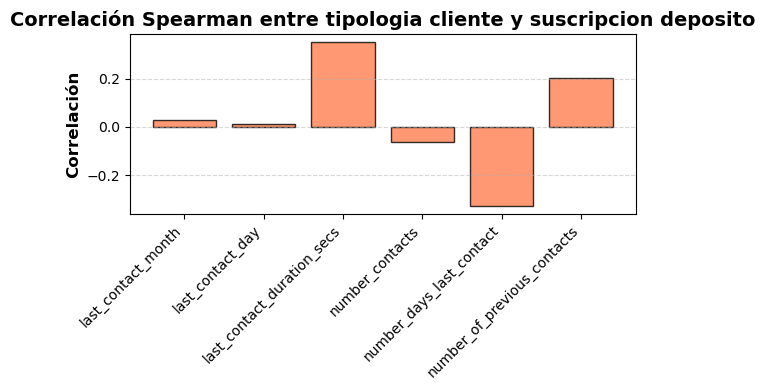

In [25]:
funciones.grafico_correlacion_spearman(df_correlacion_tipologia_contacto_spearman,df_binario,'Correlación Spearman entre tipologia cliente y suscripcion deposito')

### Correlaciones por variables macroeconomicas

In [26]:
df_correlacion_macroeconomicas_spearman=df_binario[['subscribed_term_deposit','employement_variation_rate',
       'consumer_price_index', 'consumer_confidence_index', 'euribor_3m']].corr(method='spearman').iloc[0,1:].to_frame()  

employement_variation_rate,1.4,-1.8,1.1,-0.1,-2.9,-3.4,-1.7,-1.1,-3.0,-0.2
count,16228,9182,7762,3682,1662,1070,773,635,172,10


employement_variation_rate,1.4,-1.8,1.1,-0.1,-2.9,-3.4,-1.7,-1.1,-3.0,-0.2
proportion,39.411308,22.299398,18.850787,8.942102,4.036332,2.598601,1.877307,1.54216,0.417719,0.024286


********************************************************************************


consumer_price_index,93.994,93.918,92.893,93.444,94.465,93.200,93.075,92.201,92.963,92.431,...,94.027,94.055,93.876,94.601,92.469,93.749,92.713,94.767,93.798,92.756
count,7762,6681,5793,5173,4374,3615,2457,770,715,446,...,233,229,212,204,177,174,172,128,67,10


consumer_price_index,93.994,93.918,92.893,93.444,94.465,93.200,93.075,92.201,92.963,92.431,...,94.027,94.055,93.876,94.601,92.469,93.749,92.713,94.767,93.798,92.756
proportion,18.850787,16.225471,14.068875,12.563144,10.622693,8.779386,5.967068,1.870021,1.736448,1.083155,...,0.565864,0.556149,0.514863,0.495434,0.429862,0.422576,0.417719,0.310861,0.162716,0.024286


********************************************************************************


consumer_confidence_index,-36.4,-42.7,-46.2,-36.1,-41.8,-42.0,-47.1,-31.4,-40.8,-26.9,...,-38.3,-39.8,-40.0,-49.5,-33.6,-34.6,-33.0,-50.8,-40.4,-45.9
count,7762,6681,5793,5173,4374,3615,2457,770,715,446,...,233,229,212,204,177,174,172,128,67,10


consumer_confidence_index,-36.4,-42.7,-46.2,-36.1,-41.8,-42.0,-47.1,-31.4,-40.8,-26.9,...,-38.3,-39.8,-40.0,-49.5,-33.6,-34.6,-33.0,-50.8,-40.4,-45.9
proportion,18.850787,16.225471,14.068875,12.563144,10.622693,8.779386,5.967068,1.870021,1.736448,1.083155,...,0.565864,0.556149,0.514863,0.495434,0.429862,0.422576,0.417719,0.310861,0.162716,0.024286


********************************************************************************


euribor_3m,4.857,4.962,4.963,4.961,4.856,4.964,1.405,4.965,4.864,4.960,...,1.047,1.045,0.996,3.743,3.816,3.853,3.901,0.969,0.956,3.669
count,2868,2611,2487,1902,1210,1175,1169,1070,1044,1013,...,1,1,1,1,1,1,1,1,1,1


euribor_3m,4.857,4.962,4.963,4.961,4.856,4.964,1.405,4.965,4.864,4.960,...,1.047,1.045,0.996,3.743,3.816,3.853,3.901,0.969,0.956,3.669
proportion,6.965222,6.341072,6.039926,4.619196,2.938605,2.853604,2.839032,2.598601,2.535458,2.460171,...,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429,0.002429


********************************************************************************


,subscribed_term_deposit
employement_variation_rate,-0.247427
consumer_price_index,-0.122123
consumer_confidence_index,0.041127
euribor_3m,-0.266772


********************************************************************************


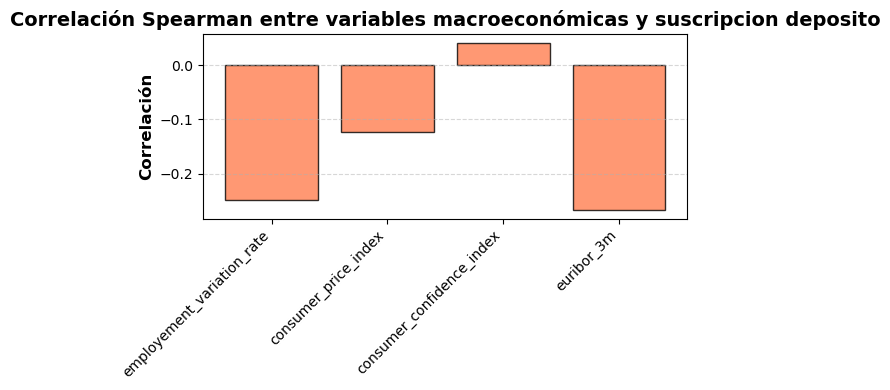

In [27]:
funciones.grafico_correlacion_spearman(df_correlacion_macroeconomicas_spearman,df_binario,'Correlación Spearman entre variables macroeconómicas y suscripcion deposito')

### Resumen correlaciones spearman

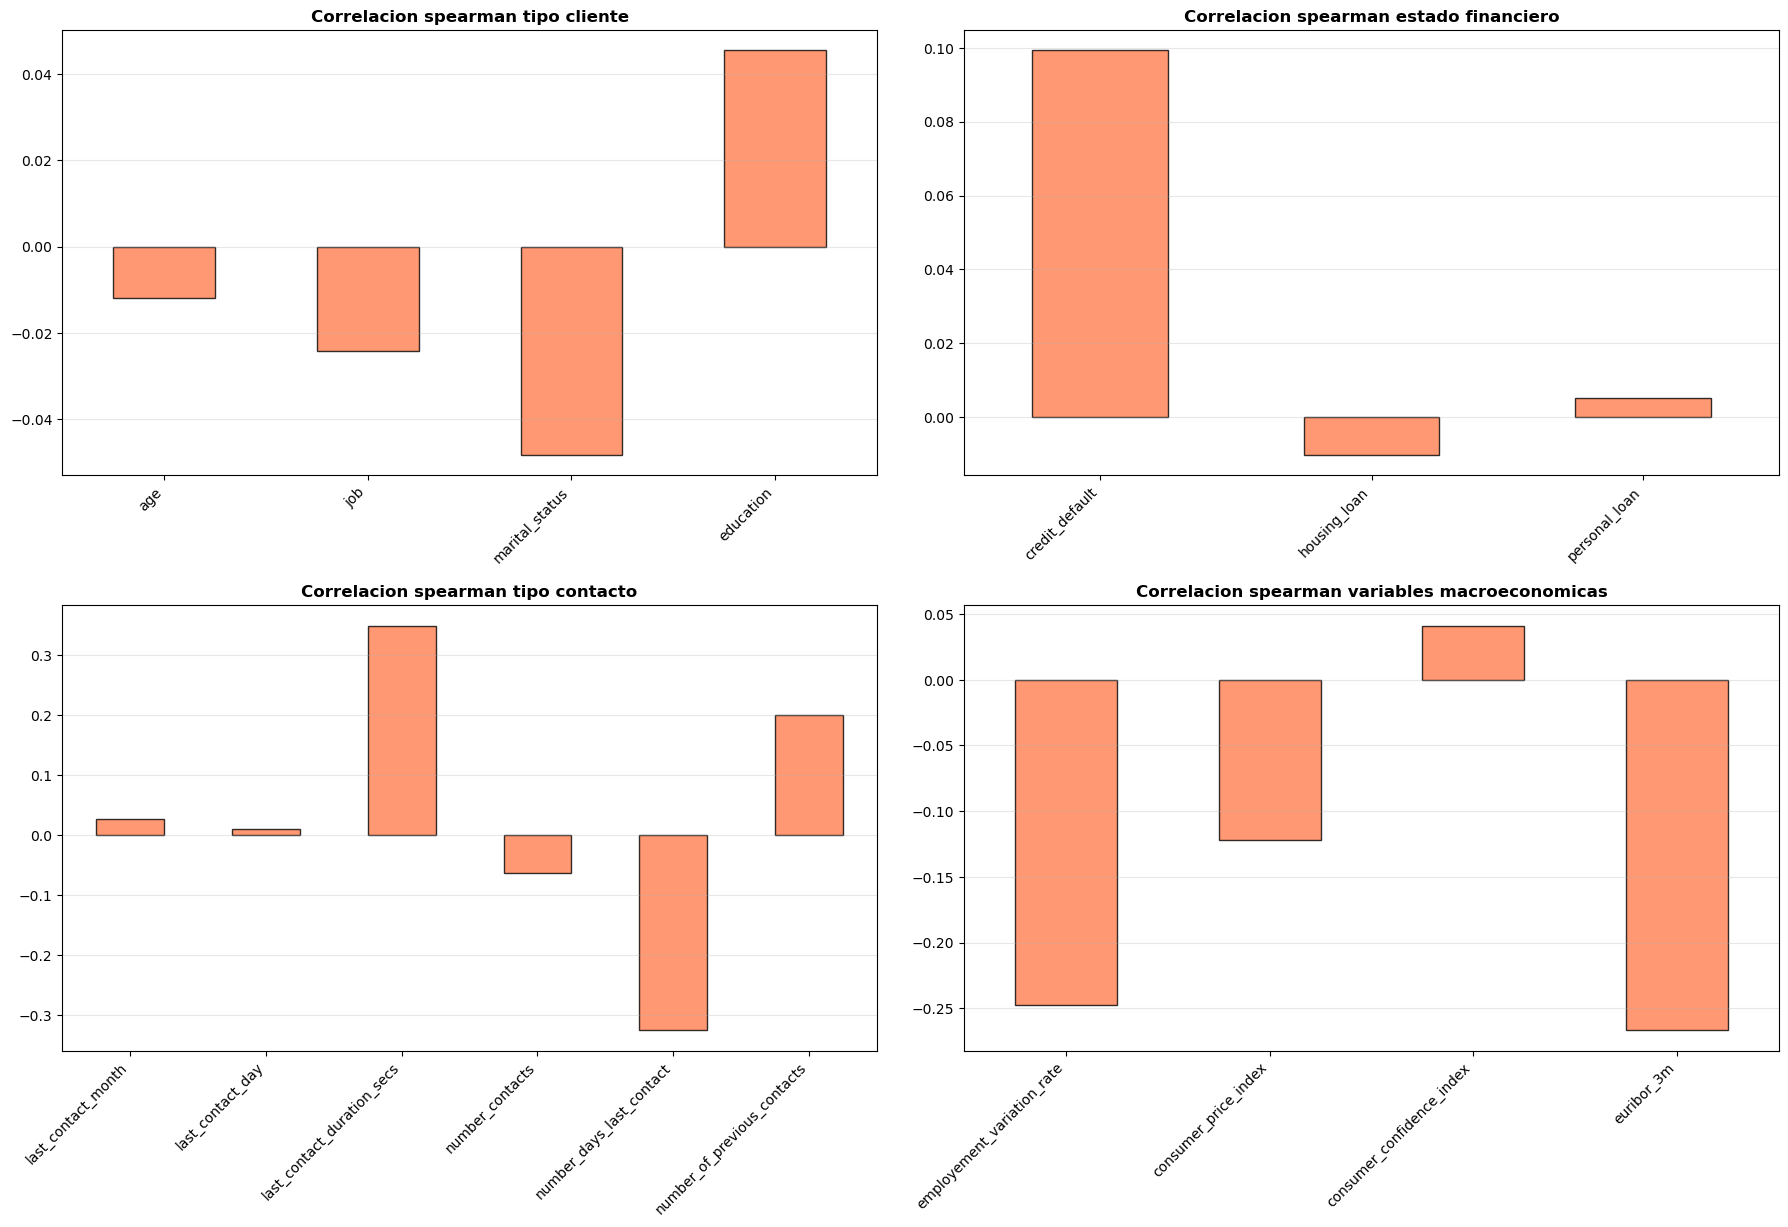

In [28]:
#Graficamos las variables calculadas por metodo spearman
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
# Definimos los colores a usar en los graficos
colors = ['coral']

# Correlacion entre tipologia de cliente y suscripcion deposito
ax = axes[0, 0]
df_correlacion_tipologia_cliente_spearman.reset_index().plot(
    x='index',
    y='subscribed_term_deposit',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False) 
ax.set_title('Correlacion spearman tipo cliente', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)
ax.set_xlabel('')

# Correlacion entre estado financiero y suscripcion deposito
ax = axes[0, 1]
df_correlacion_estado_financiero_spearman.reset_index().plot(
    x='index',
    y='subscribed_term_deposit',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Correlacion spearman estado financiero', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)
ax.set_xlabel('')

# Correlacion entre tipologia de contacto y suscripcion deposito
ax = axes[1, 0]
df_correlacion_tipologia_contacto_spearman.reset_index().plot(
    x='index',
    y='subscribed_term_deposit',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Correlacion spearman tipo contacto', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)
ax.set_xlabel('')

# Correlacion entre variables macroeconomicas y suscripcion deposito
ax = axes[1, 1]
df_correlacion_macroeconomicas_spearman.reset_index().plot(
    x='index',
    y='subscribed_term_deposit',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Correlacion spearman variables macroeconomicas', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)
ax.set_xlabel('')

# Ajustamos el layout 
plt.tight_layout()
fig.subplots_adjust(bottom=0.12)
plt.show()

## Correlaciones chi2, pvalor, dof

In [29]:
# Creamos las diferentes tablas de contoingencia para analizar la correlacion entre variables categóricas y la variable objetivo subscribed_term_deposit.
# Tablas de contingencia tipologia de clientes.
df_correlacion_age_group=pd.crosstab(df_bank_clean['age_group'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_job=pd.crosstab(df_bank_clean['job'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_marital_status=pd.crosstab(df_bank_clean['marital_status'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_education=pd.crosstab(df_bank_clean['education'], df_bank_clean['subscribed_term_deposit'], normalize='index')
# Tablas de contingencia perfil financiero del cliente.
df_correlacion_credit_default=pd.crosstab(df_bank_clean['credit_default'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_housing_loan=pd.crosstab(df_bank_clean['housing_loan'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_personal_loan=pd.crosstab(df_bank_clean['personal_loan'], df_bank_clean['subscribed_term_deposit'], normalize='index')
# Tablas de contingencia por tipo de contacto
df_correlacion_number_of_previous_contacts=pd.crosstab(df_bank_clean['number_of_previous_contacts'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_last_contact_duration_mins=pd.crosstab(df_bank_clean['last_contact_duration_mins_group'],df_bank_clean['subscribed_term_deposit'],normalize='index')
# Tablas contingencia variables macroeconómicas.
df_correlacion_employement_variation_rate=pd.crosstab(df_bank_clean['employement_variation_rate_group'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_consumer_price_index=pd.crosstab(df_bank_clean['consumer_price_index_group'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_consumer_confidence_index=pd.crosstab(df_bank_clean['consumer_confidence_index_group'], df_bank_clean['subscribed_term_deposit'], normalize='index')
df_correlacion_euribor_3m=pd.crosstab(df_bank_clean['euribor_3m_group'], df_bank_clean['subscribed_term_deposit'], normalize='index')

### Correlaciones tipo de cliente

In [30]:
df_bank_clean['subscribed_term_deposit'].value_counts(normalize=True)*100

subscribed_term_deposit
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

chi2=0.7229, p=0.9817, dof=5
********************************************************************************


age_group,26 - 35,36 - 45,46 - 55,56 - 65,18 - 25,65+
count,13684,13495,8702,3566,1062,662


********************************************************************************


age_group,26 - 35,36 - 45,46 - 55,56 - 65,18 - 25,65+
proportion,33.236987,32.777926,21.136237,8.661436,2.579486,1.607928


********************************************************************************


subscribed_term_deposit,no,yes
age_group,,
18 - 25,0.760829,0.239171
26 - 35,0.878252,0.121748
36 - 45,0.913449,0.086551
46 - 55,0.913583,0.086417
56 - 65,0.864274,0.135726
65+,0.527190,0.472810


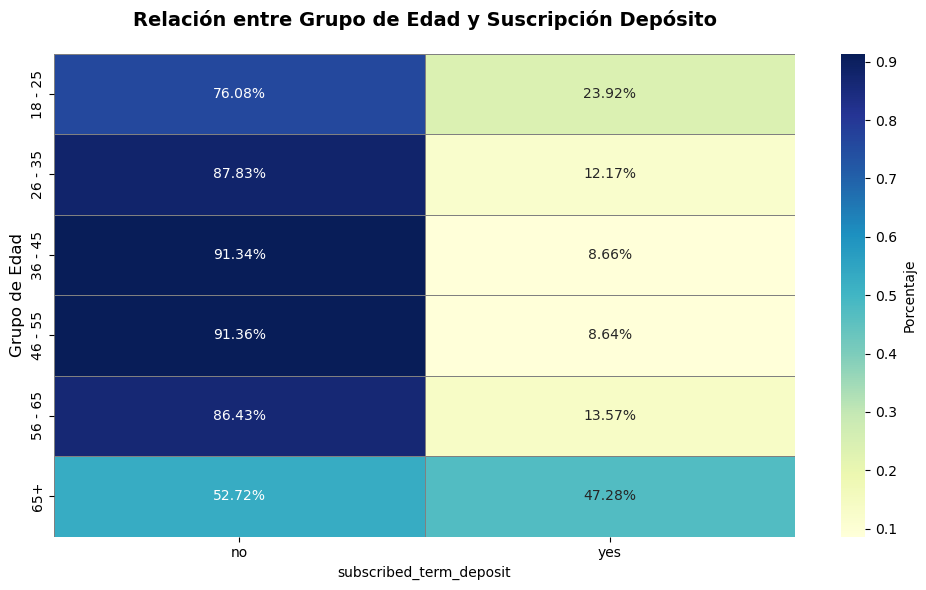

In [31]:
funciones.heatmap_correlation(df_correlacion_age_group,df_bank_clean,'age_group','Relación entre Grupo de Edad y Suscripción Depósito','Grupo de Edad')

chi2=0.5131, p=1.0000, dof=11
********************************************************************************


job,administrative_staff,blue_collar,technician,services,management,retired,entrepreneur,self_employed,housemaid,unemployed,student,unknown
count,10419,9253,6739,3967,2924,1718,1456,1421,1060,1014,875,330


********************************************************************************


job,administrative_staff,blue_collar,technician,services,management,retired,entrepreneur,self_employed,housemaid,unemployed,student,unknown
proportion,25.303575,22.471828,16.36633,9.634253,7.101224,4.172333,3.53604,3.451039,2.574315,2.4626,2.125024,0.801438


********************************************************************************


subscribed_term_deposit,no,yes
job,,
unknown,0.887879,0.112121
unemployed,0.857988,0.142012
student,0.685714,0.314286
retired,0.747381,0.252619
housemaid,0.900000,0.100000
services,0.918578,0.081422
blue_collar,0.931049,0.068951
self_employed,0.895144,0.104856
administrative_staff,0.870333,0.129667


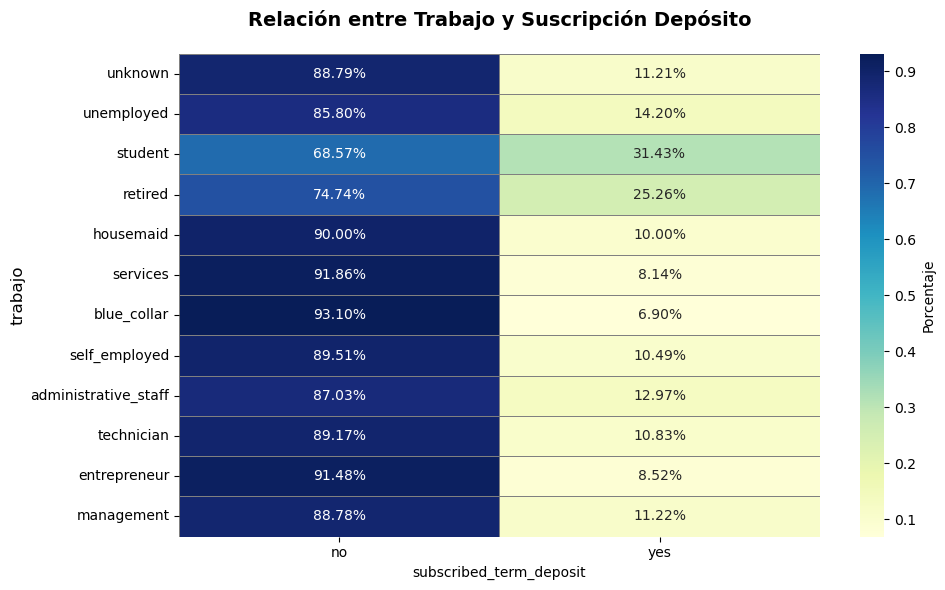

In [32]:
funciones.heatmap_correlation(df_correlacion_job,df_bank_clean,'job','Relación entre Trabajo y Suscripción Depósito','trabajo')

chi2=0.0172, p=0.9994, dof=3
********************************************************************************


marital_status,married,single,divorced,unknown
count,24921,11564,4611,80


********************************************************************************


marital_status,married,single,divorced,unknown
proportion,60.52312,28.084321,11.198271,0.194288


********************************************************************************


subscribed_term_deposit,no,yes
marital_status,,
unknown,0.850000,0.150000
single,0.859910,0.140090
married,0.898439,0.101561
divorced,0.896769,0.103231


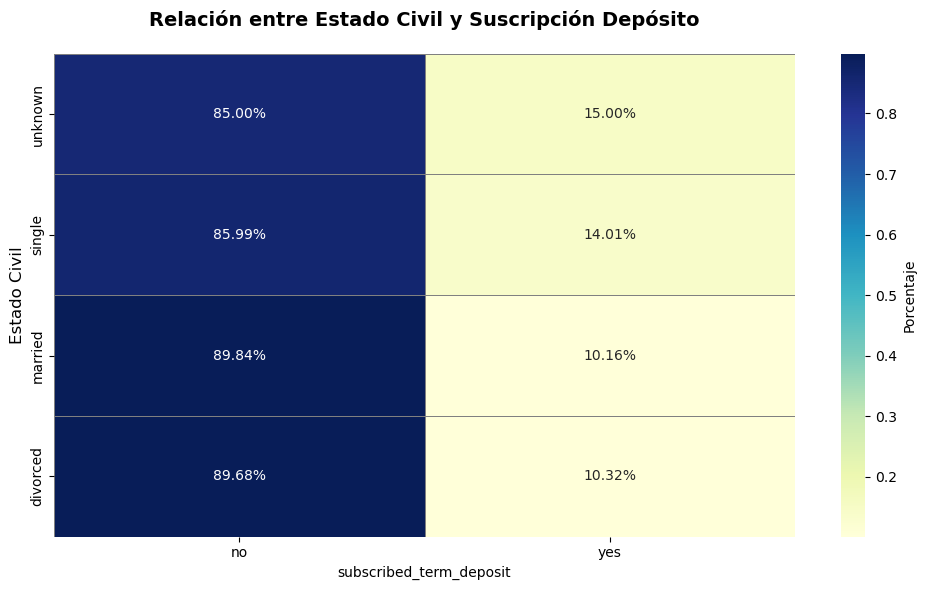

In [33]:
funciones.heatmap_correlation(df_correlacion_marital_status,df_bank_clean,'marital_status','Relación entre Estado Civil y Suscripción Depósito','Estado Civil')

chi2=0.1378, p=1.0000, dof=7
********************************************************************************


education,university_degree,high_school,basic_9y,professional_course,basic_4y,basic_6y,unknown,illiterate
count,12164,9512,6045,5240,4176,2291,1730,18


********************************************************************************


education,university_degree,high_school,basic_9y,professional_course,basic_4y,basic_6y,unknown,illiterate
proportion,29.54148,23.100835,14.680882,12.72586,10.14183,5.563921,4.201477,0.043715


********************************************************************************


subscribed_term_deposit,no,yes
education,,
unknown,0.854913,0.145087
illiterate,0.777778,0.222222
basic_4y,0.897510,0.102490
basic_6y,0.917940,0.082060
basic_9y,0.921754,0.078246
high_school,0.891611,0.108389
professional_course,0.886450,0.113550
university_degree,0.862792,0.137208


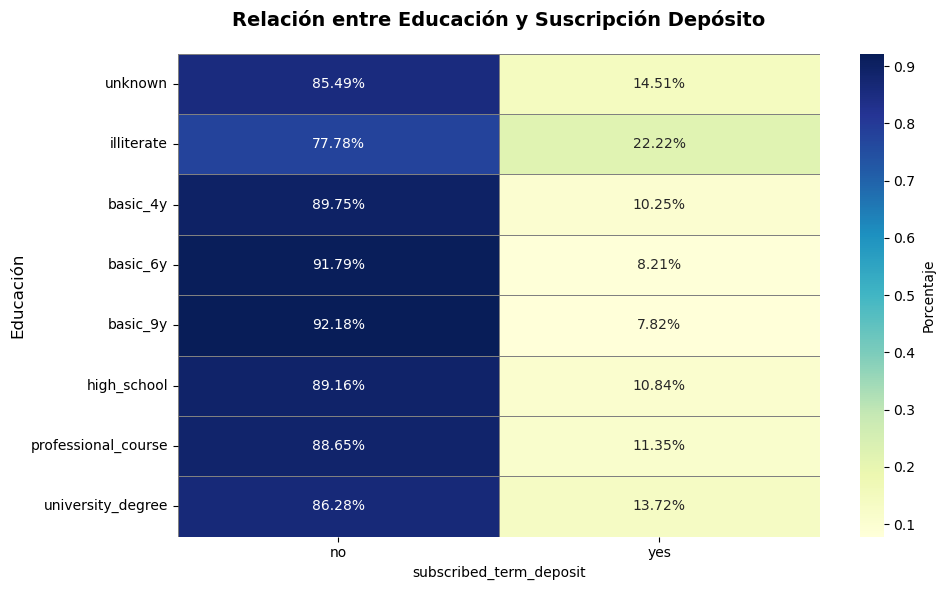

In [34]:
funciones.heatmap_correlation(df_correlacion_education,df_bank_clean,'education','Relación entre Educación y Suscripción Depósito','Educación')

#### Resumen correlaciones por tipologia de cliente

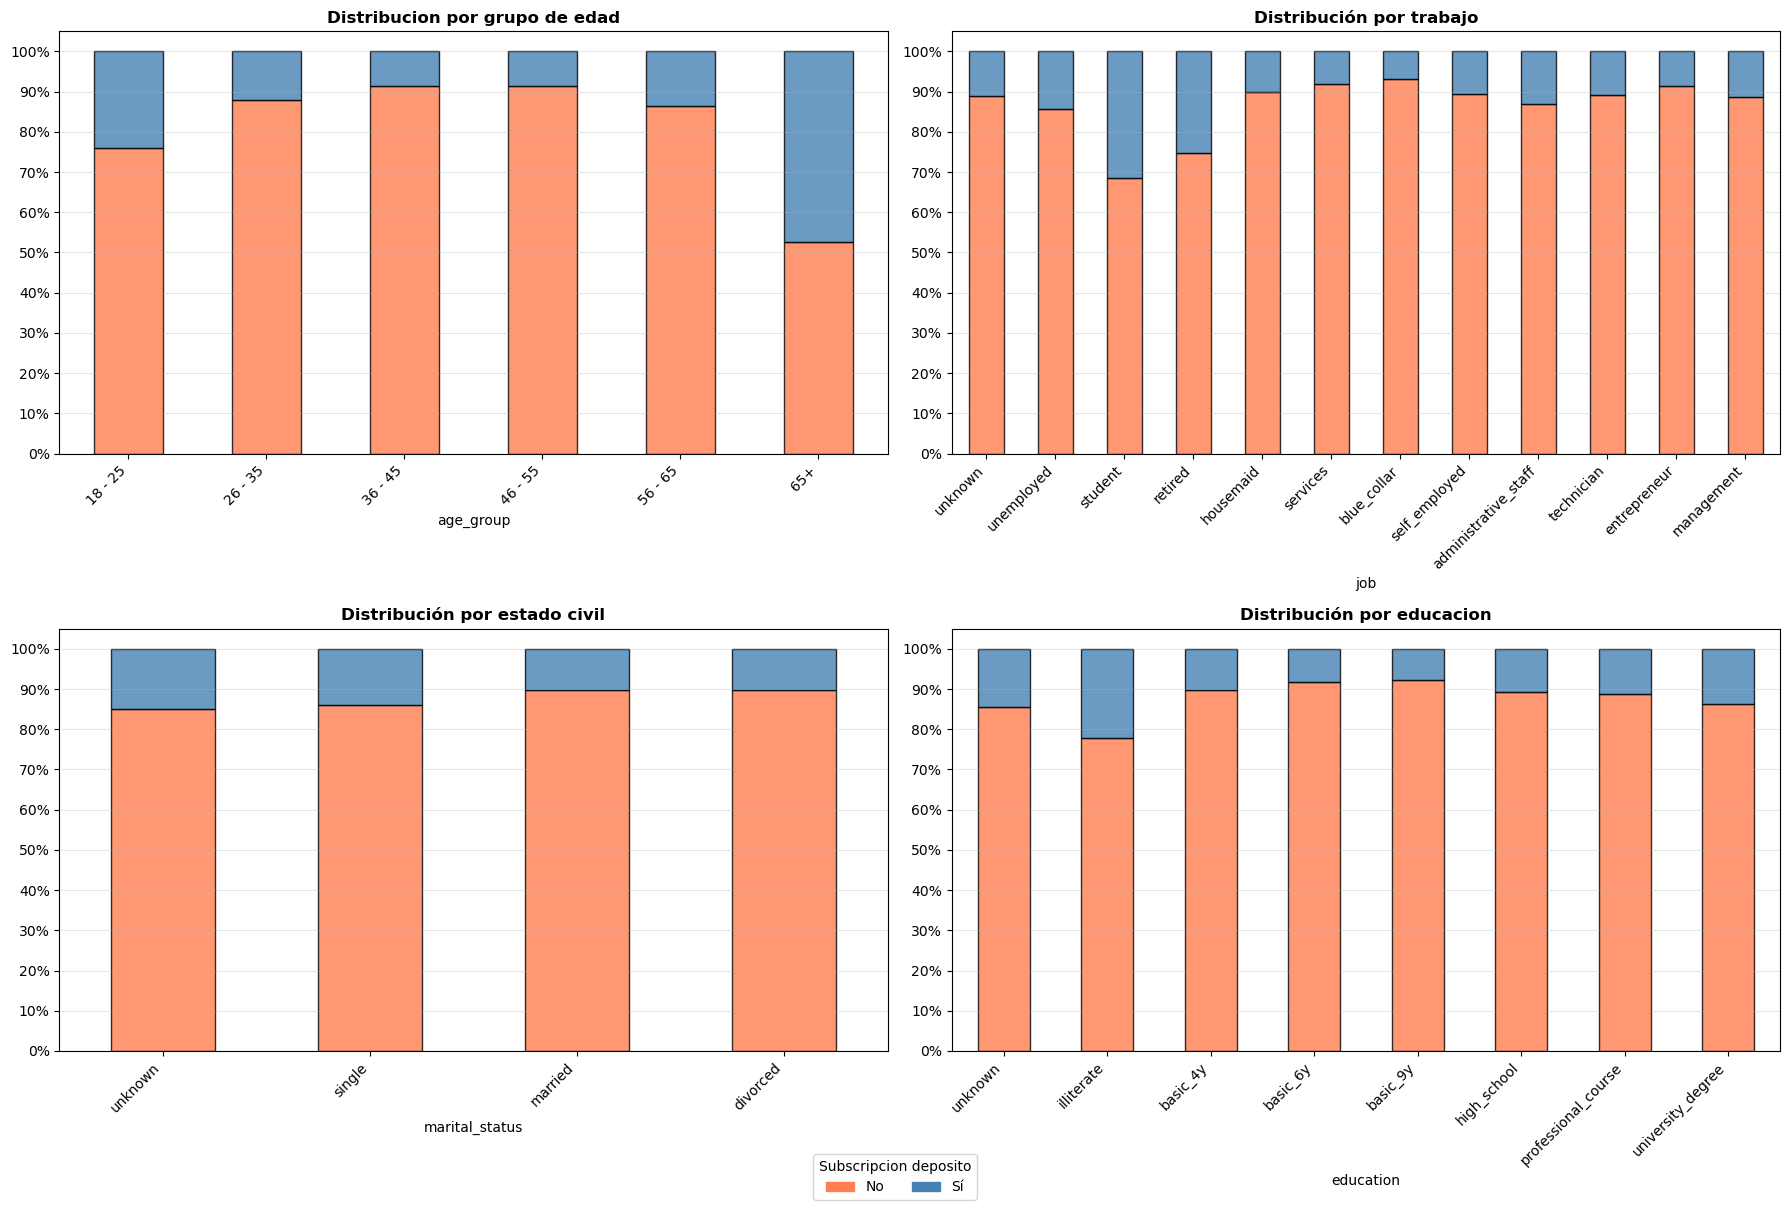

In [35]:
#Graficamos las variables sociales con respecto a la subscripcion de un deposito
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
# Definimos los colores a usar en los graficos
colors = ['coral', 'steelblue']

# Correlacion entre grupo de edad y suscripcion deposito
ax = axes[0, 0]
df_correlacion_age_group.reset_index().plot(
    x='age_group',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False) 
ax.set_title('Distribucion por grupo de edad', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre trabajo y suscripcion deposito
ax = axes[0, 1]
df_correlacion_job.reset_index().plot(
    x='job',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por trabajo', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre estado civil y suscripcion deposito
ax = axes[1, 0]
df_correlacion_marital_status.reset_index().plot(
    x='marital_status',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por estado civil', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre education y suscripcion deposito
ax = axes[1, 1]
df_correlacion_education.reset_index().plot(
    x='education',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por educacion', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Ajustamos el layout 
plt.tight_layout()
fig.subplots_adjust(bottom=0.12)
# Creamos los lables de subscripcion eposito para mostrar en la parte inferior del grafico
lable_no=mpatches.Patch(color=colors[0], label='No')
lable_si=mpatches.Patch(color=colors[1], label='Sí')
handles = [lable_no, lable_si]
fig.legend(handles=handles, title='Subscripcion deposito',
           loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))
plt.show()

### Correlaciones estado financiero del cliente

chi2=0.1488, p=0.9283, dof=2
********************************************************************************


credit_default,no,unknown,yes
count,32577,8596,3


********************************************************************************


credit_default,no,unknown,yes
proportion,79.116476,20.876239,0.007286


********************************************************************************


subscribed_term_deposit,no,yes
credit_default,,
unknown,0.948464,0.051536
yes,1.000000,0.000000
no,0.871197,0.128803


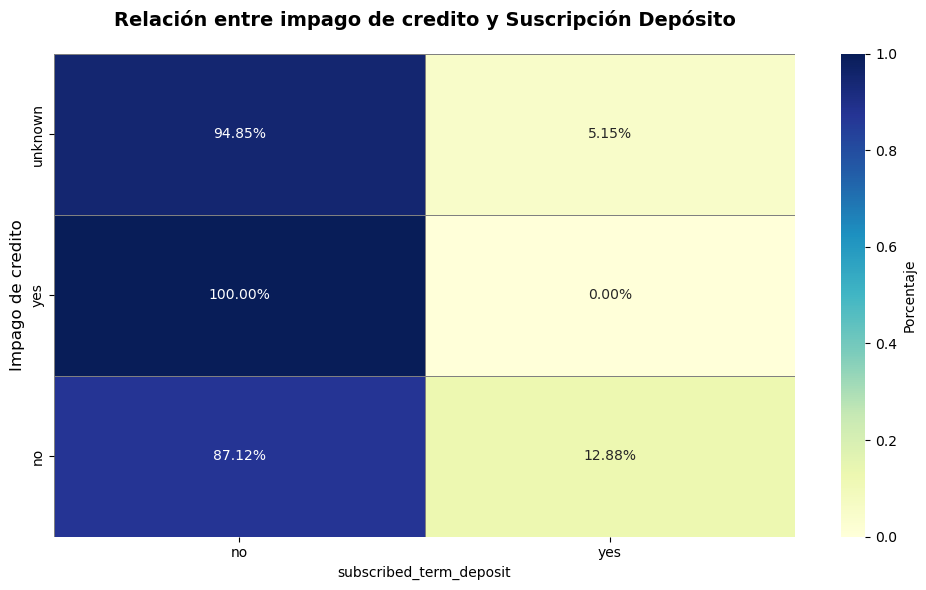

In [36]:
funciones.heatmap_correlation(df_correlacion_credit_default,df_bank_clean,'credit_default','Relación entre impago de credito y Suscripción Depósito','Impago de credito')

chi2=0.0004, p=0.9998, dof=2
********************************************************************************


housing_loan,yes,no,unknown
count,21571,18615,990


********************************************************************************


housing_loan,yes,no,unknown
proportion,52.387313,45.208374,2.404313


********************************************************************************


subscribed_term_deposit,no,yes
housing_loan,,
unknown,0.891919,0.108081
yes,0.883779,0.116221
no,0.891217,0.108783


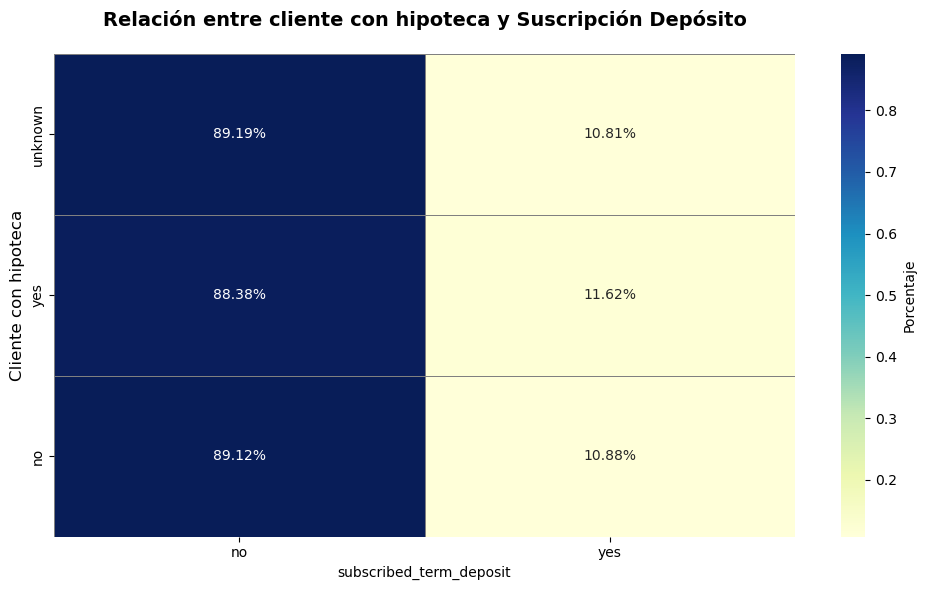

In [37]:
funciones.heatmap_correlation(df_correlacion_housing_loan,df_bank_clean,'housing_loan','Relación entre cliente con hipoteca y Suscripción Depósito','Cliente con hipoteca')

chi2=0.0002, p=0.9999, dof=2
********************************************************************************


personal_loan,no,yes,unknown
count,33938,6248,990


********************************************************************************


personal_loan,no,yes,unknown
proportion,82.421799,15.173888,2.404313


********************************************************************************


subscribed_term_deposit,no,yes
personal_loan,,
unknown,0.891919,0.108081
yes,0.890685,0.109315
no,0.886587,0.113413


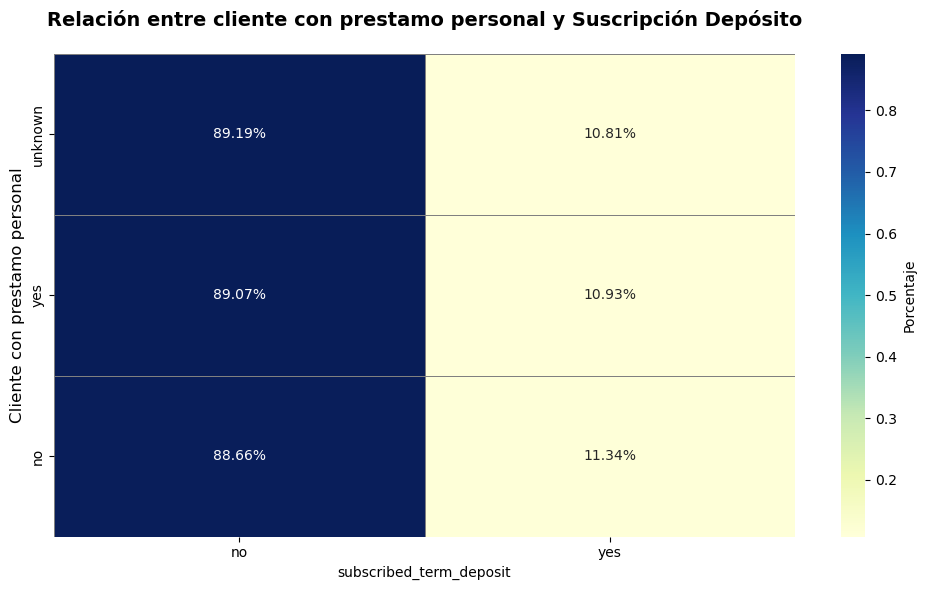

In [38]:
funciones.heatmap_correlation(df_correlacion_personal_loan,df_bank_clean,'personal_loan','Relación entre cliente con prestamo personal y Suscripción Depósito','Cliente con prestamo personal')

#### Resumen correlaciones por estado finaciero del cliente

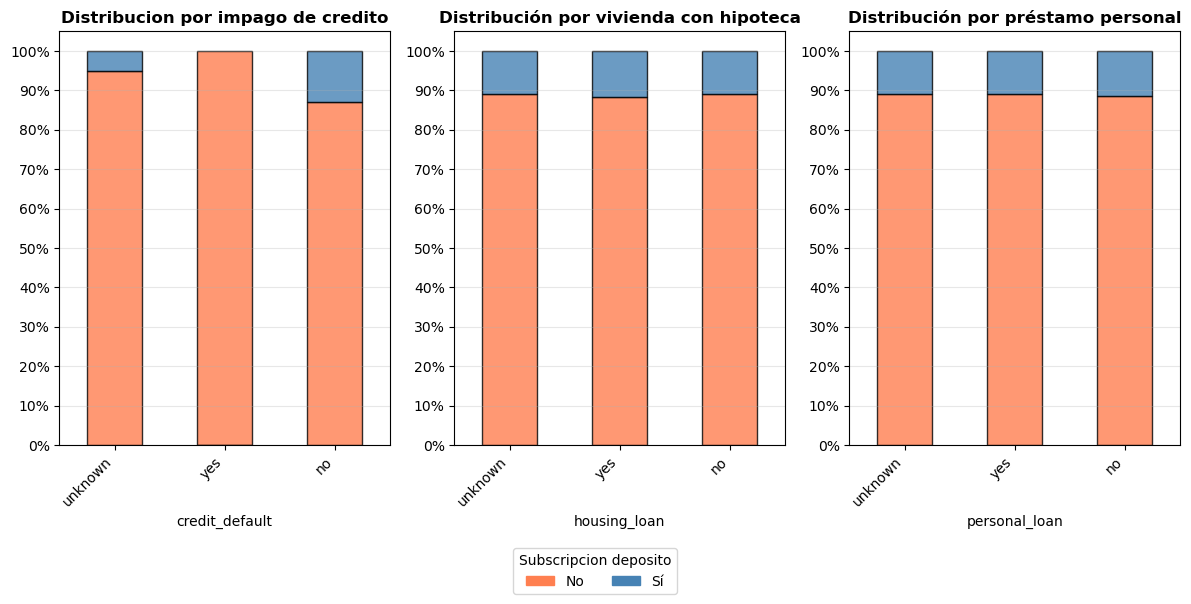

In [39]:
#Graficamos las variables economicas con respecto a la subscripcion de un deposito
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
# Definimos los colores a usar en los graficos
colors = ['coral', 'steelblue']

# Correlacion entre grupo de edad y suscripcion deposito
ax = axes[0]
df_correlacion_credit_default.reset_index().plot(
    x='credit_default',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False) 
ax.set_title('Distribucion por impago de credito', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre trabajo y suscripcion deposito
ax = axes[1]
df_correlacion_housing_loan.reset_index().plot(
    x='housing_loan',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por vivienda con hipoteca', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre estado civil y suscripcion deposito
ax = axes[2]
df_correlacion_personal_loan.reset_index().plot(
    x='personal_loan',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por préstamo personal', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)


# Ajustamos el layout 
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)
# Creamos los lables de subscripcion eposito para mostrar en la parte inferior del grafico
lable_no=mpatches.Patch(color=colors[0], label='No')
lable_si=mpatches.Patch(color=colors[1], label='Sí')
handles = [lable_no, lable_si]
fig.legend(handles=handles, title='Subscripcion deposito',
           loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))
plt.show()

### Correlaciones por tipologia de contacto

chi2=2.0697, p=0.9559, dof=7
********************************************************************************


number_of_previous_contacts,0,1,2,3,4,5,6,7
count,35551,4561,754,216,70,18,5,1


********************************************************************************


number_of_previous_contacts,0,1,2,3,4,5,6,7
proportion,86.33913,11.076841,1.831164,0.524577,0.170002,0.043715,0.012143,0.002429


********************************************************************************


subscribed_term_deposit,no,yes
number_of_previous_contacts,,
0,0.911676,0.088324
1,0.787985,0.212015
2,0.535809,0.464191
3,0.407407,0.592593
4,0.457143,0.542857
5,0.277778,0.722222
6,0.400000,0.600000
7,1.000000,0.000000


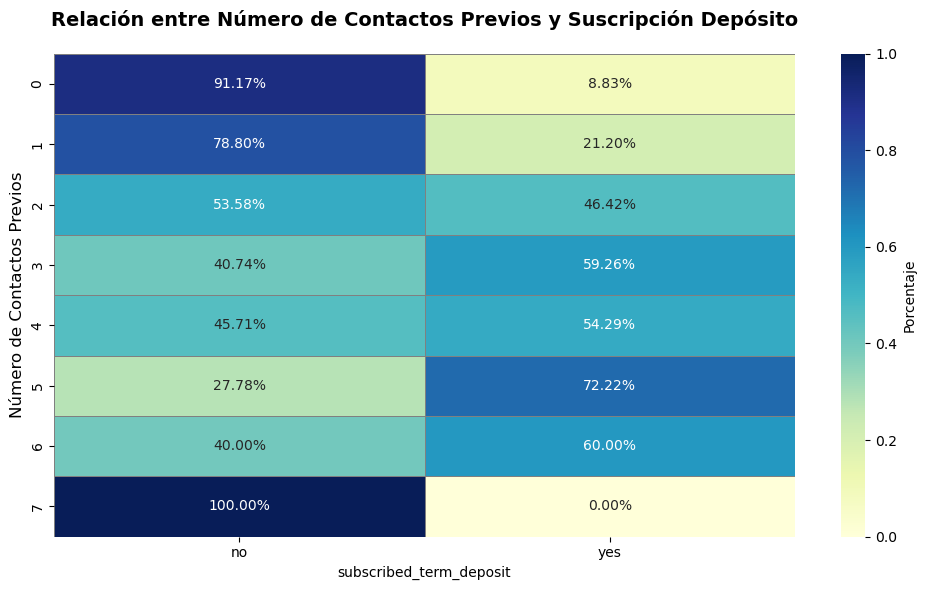

In [40]:
funciones.heatmap_correlation(df_correlacion_number_of_previous_contacts,df_bank_clean,'number_of_previous_contacts','Relación entre Número de Contactos Previos y Suscripción Depósito','Número de Contactos Previos')

chi2=2.1549, p=0.9049, dof=6
********************************************************************************


last_contact_duration_mins_group,3 - 5,1 - 2,2 - 3,5 - 10,0 - 1,10 - 20,20+
count,9349,8612,7788,7770,4179,2963,515


********************************************************************************


last_contact_duration_mins_group,3 - 5,1 - 2,2 - 3,5 - 10,0 - 1,10 - 20,20+
proportion,22.704974,20.915096,18.91393,18.870216,10.149116,7.195939,1.250729


********************************************************************************


subscribed_term_deposit,no,yes
last_contact_duration_mins_group,,
0 - 1,0.999761,0.000239
1 - 2,0.981073,0.018927
2 - 3,0.949409,0.050591
3 - 5,0.898385,0.101615
5 - 10,0.814543,0.185457
10 - 20,0.537968,0.462032
20+,0.376699,0.623301


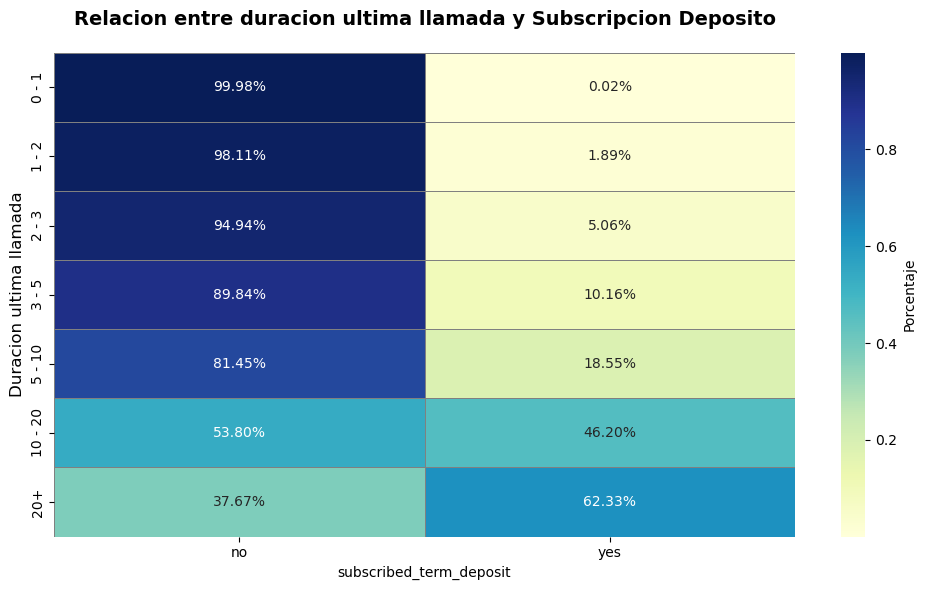

In [41]:
funciones.heatmap_correlation(df_correlacion_last_contact_duration_mins,df_bank_clean,'last_contact_duration_mins_group','Relacion entre duracion ultima llamada y Subscripcion Deposito','Duracion ultima llamada')

#### Resumen correlaciones por tipo de contacto

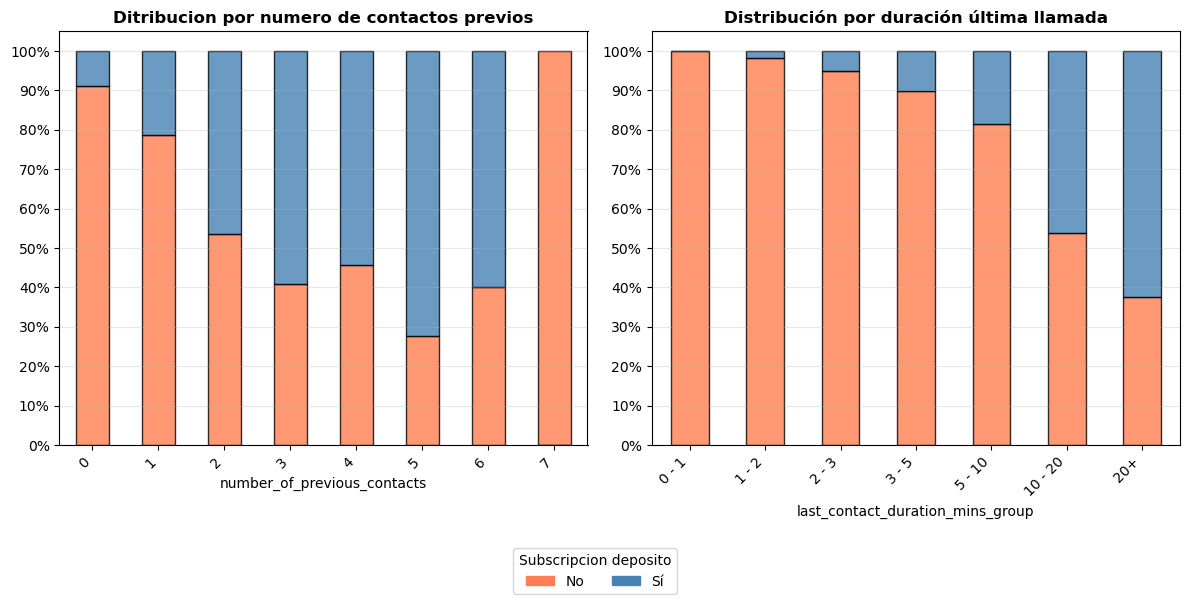

In [42]:
#Graficamos la tipologia de contacto con respecto a la subscripcion de un deposito
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Definimos los colores a usar en los graficos
colors = ['coral', 'steelblue']

# Correlacion entre numero de contactos previos y suscripcion deposito
ax = axes[0]
df_correlacion_number_of_previous_contacts.reset_index().plot(
    x='number_of_previous_contacts',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False) 
ax.set_title('Ditribucion por numero de contactos previos', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre duracion ultima llamada y suscripcion deposito
ax = axes[1]
df_correlacion_last_contact_duration_mins.reset_index().plot(
    x='last_contact_duration_mins_group',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por duración última llamada', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Ajustamos el layout 
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)
# Creamos los lables de subscripcion eposito para mostrar en la parte inferior del grafico
lable_no=mpatches.Patch(color=colors[0], label='No')
lable_si=mpatches.Patch(color=colors[1], label='Sí')
handles = [lable_no, lable_si]
fig.legend(handles=handles, title='Subscripcion deposito',
           loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))
plt.show()

### Correlaciones por variables macroeconomicas

chi2=0.2326, p=0.8902, dof=2
********************************************************************************


employement_variation_rate_group,> 0.5,< -0.5,-0.5 - 0,0 - 0.5
count,23990,13494,3692,0


********************************************************************************


employement_variation_rate_group,> 0.5,< -0.5,-0.5 - 0,0 - 0.5
proportion,58.262094,32.771517,8.966388,0.0


********************************************************************************


subscribed_term_deposit,no,yes
employement_variation_rate_group,,
< -0.5,0.755447,0.244553
-0.5 - 0,0.936891,0.063109
> 0.5,0.953897,0.046103


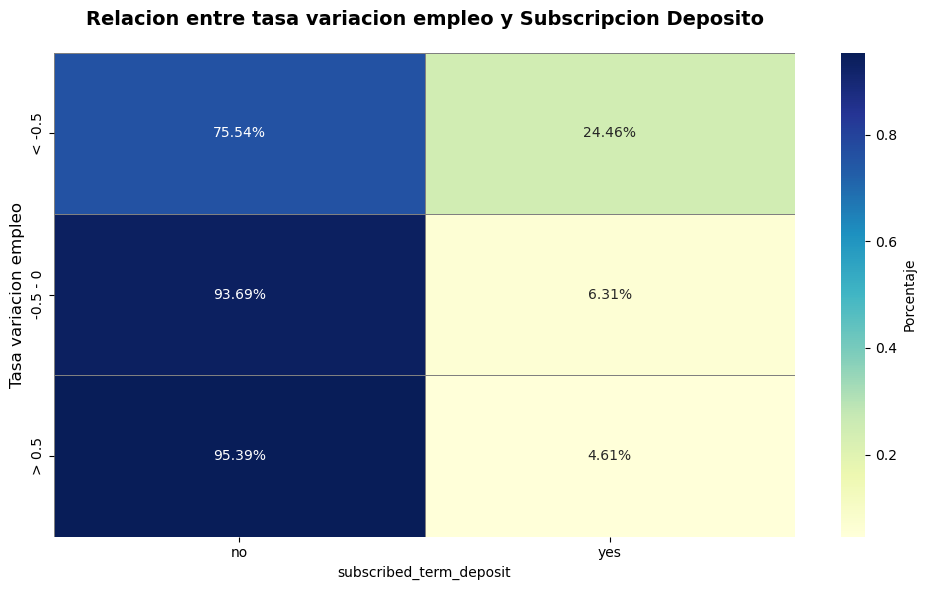

In [43]:
funciones.heatmap_correlation(df_correlacion_employement_variation_rate,df_bank_clean,'employement_variation_rate_group','Relacion entre tasa variacion empleo y Subscripcion Deposito','Tasa variacion empleo')

chi2=0.0000, p=1.0000, dof=1
********************************************************************************


consumer_price_index_group,90 - 94,94 - 100,<90,100 - 104,104+
count,35394,5782,0,0,0


********************************************************************************


consumer_price_index_group,90 - 94,94 - 100,<90,100 - 104,104+
proportion,85.95784,14.04216,0.0,0.0,0.0


********************************************************************************


subscribed_term_deposit,no,yes
consumer_price_index_group,,
90 - 94,0.894135,0.105865
94 - 100,0.845728,0.154272


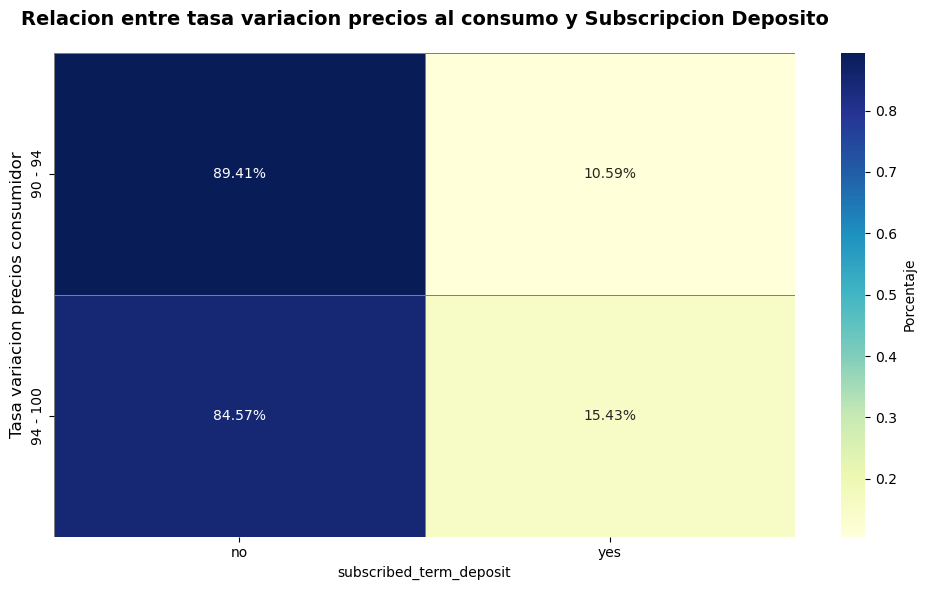

In [44]:
funciones.heatmap_correlation(df_correlacion_consumer_price_index,df_bank_clean,'consumer_price_index_group','Relacion entre tasa variacion precios al consumo y Subscripcion Deposito','Tasa variacion precios consumidor')

chi2=0.0000, p=1.0000, dof=1
********************************************************************************


consumer_confidence_index_group,<=-35,-35 - 0,0 - 35,35 - 100,> 100
count,38549,2627,0,0,0


********************************************************************************


consumer_confidence_index_group,<=-35,-35 - 0,0 - 35,35 - 100,> 100
proportion,93.62007,6.37993,0.0,0.0,0.0


********************************************************************************


subscribed_term_deposit,no,yes
consumer_confidence_index_group,,
<=-35,0.908662,0.091338
-35 - 0,0.574419,0.425581


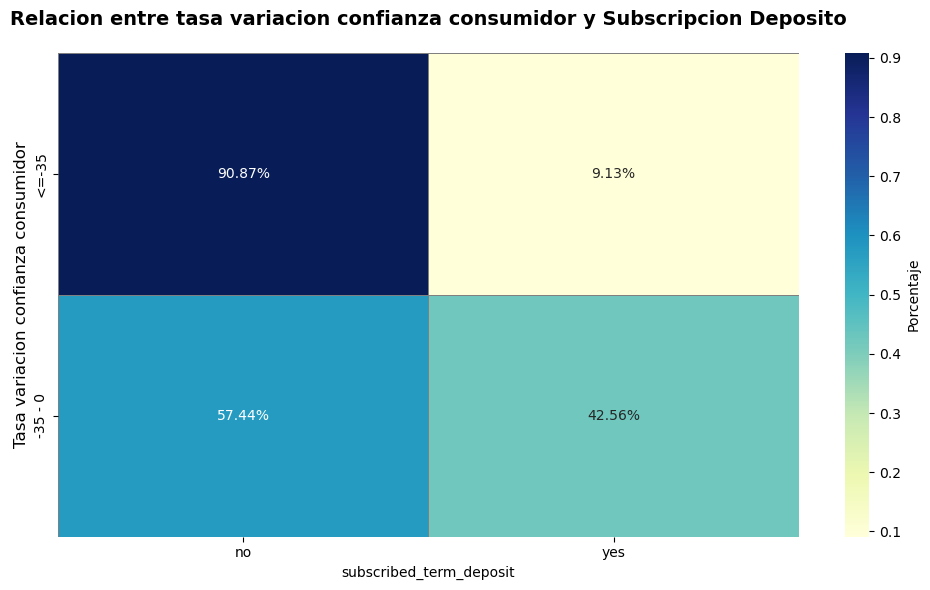

In [45]:
funciones.heatmap_correlation(df_correlacion_consumer_confidence_index,df_bank_clean,'consumer_confidence_index_group','Relacion entre tasa variacion confianza consumidor y Subscripcion Deposito','Tasa variacion confianza consumidor')

chi2=1.0022, p=0.9095, dof=4
********************************************************************************


euribor_3m_group,4 - 5,1 - 2,0 - 1,5+,3 - 4,<0,2 - 3
count,27652,9605,3889,16,14,0,0


********************************************************************************


euribor_3m_group,4 - 5,1 - 2,0 - 1,5+,3 - 4,<0,2 - 3
proportion,67.155625,23.326695,9.444822,0.038858,0.034,0.0,0.0


********************************************************************************


subscribed_term_deposit,no,yes
euribor_3m_group,,
0 - 1,0.542813,0.457187
1 - 2,0.841541,0.158459
3 - 4,0.928571,0.071429
4 - 5,0.951902,0.048098
5+,0.500000,0.500000


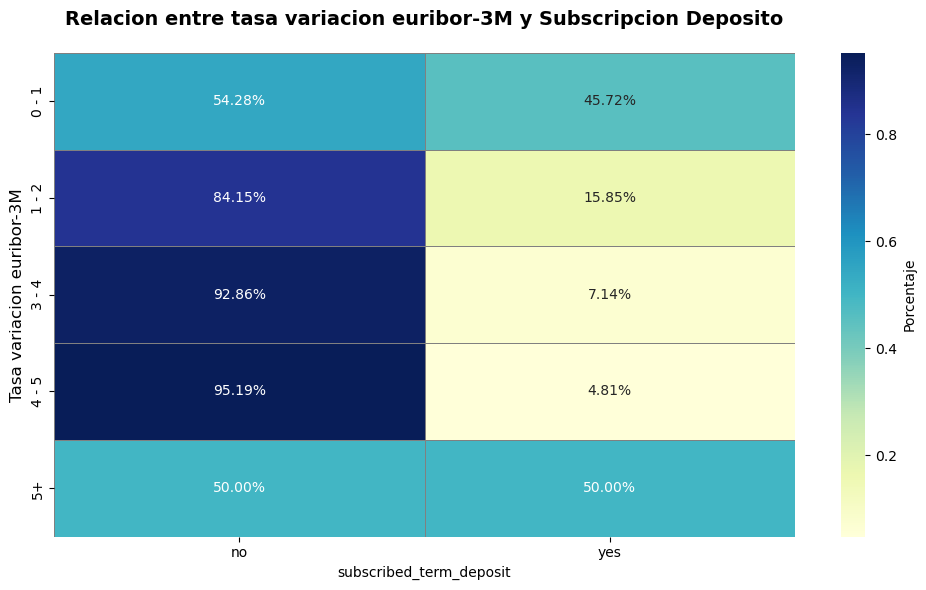

In [46]:
funciones.heatmap_correlation(df_correlacion_euribor_3m,df_bank_clean,'euribor_3m_group','Relacion entre tasa variacion euribor-3M y Subscripcion Deposito','Tasa variacion euribor-3M')

#### Resumen correlaciones por variables macroeconomicas

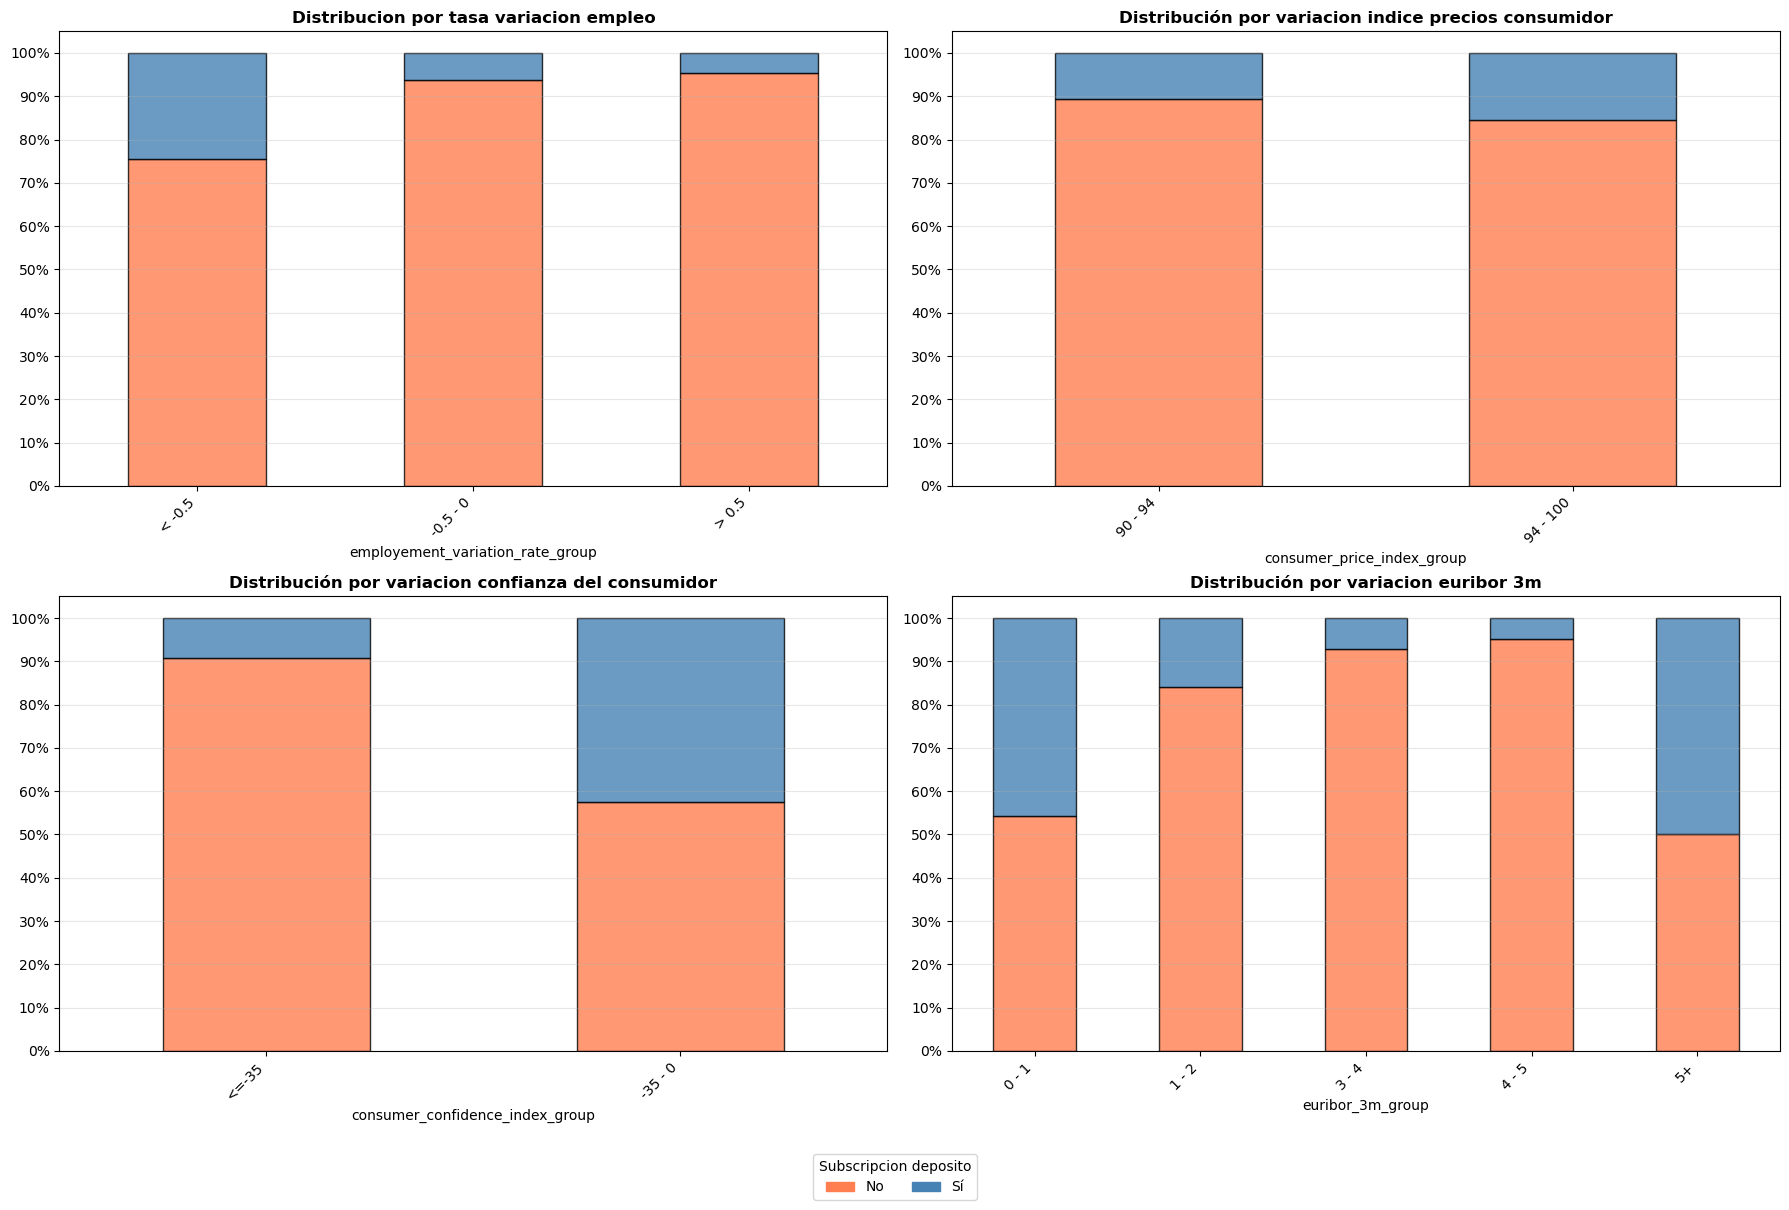

In [47]:
#Graficamos las variables sociales con respecto a la subscripcion de un deposito
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
# Definimos los colores a usar en los graficos
colors = ['coral', 'steelblue']

# Correlacion entre grupo de edad y suscripcion deposito
ax = axes[0, 0]
df_correlacion_employement_variation_rate.reset_index().plot(
    x='employement_variation_rate_group',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False) 
ax.set_title('Distribucion por tasa variacion empleo', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre trabajo y suscripcion deposito
ax = axes[0, 1]
df_correlacion_consumer_price_index.reset_index().plot(
    x='consumer_price_index_group',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por variacion indice precios consumidor', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre estado civil y suscripcion deposito
ax = axes[1, 0]
df_correlacion_consumer_confidence_index.reset_index().plot(
    x='consumer_confidence_index_group',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por variacion confianza del consumidor', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Correlacion entre education y suscripcion deposito
ax = axes[1, 1]
df_correlacion_euribor_3m.reset_index().plot(
    x='euribor_3m_group',
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='black',
    alpha=0.8,
    legend=False)   
ax.set_title('Distribución por variacion euribor 3m', fontweight='bold')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))          
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) 
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3)

# Ajustamos el layout 
plt.tight_layout()
fig.subplots_adjust(bottom=0.12)
# Creamos los lables de subscripcion eposito para mostrar en la parte inferior del grafico
lable_no=mpatches.Patch(color=colors[0], label='No')
lable_si=mpatches.Patch(color=colors[1], label='Sí')
handles = [lable_no, lable_si]
fig.legend(handles=handles, title='Subscripcion deposito',
           loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01))
plt.show()